<a href="https://colab.research.google.com/github/killerkiemklan/Data-Mining-24-25/blob/main/FS_autoencoder%2Bdbscanoptimizatin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

remove outliers before normalization


Have you missed some outliers?
Are there still missing values?
Is the data normalized?

In [1]:
pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import umap


df = pd.read_csv('num_UMAP_df.csv')
df2 = pd.read_csv('cat_UMAP_df.csv')

In [3]:
df

,Unnamed: 0,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,...,Recency_Score,Frequency_Score,Monetary_Score,CLV_Score,Orders_Night,Orders_Dawn,Orders_Morning,Orders_Afternoon,Orders_Evening,Orders_Dusk
0,0,18,2,5,1,0,1,0.00,0.00,0.00,...,0.010989,0.250000,0.020362,0.092846,0,0,0,0,2,0
1,1,17,2,2,2,0,1,12.82,6.39,0.00,...,0.010989,0.250000,0.013544,0.090596,0,0,2,0,0,0
2,2,38,1,2,2,0,1,9.20,0.00,0.00,...,0.010989,0.250000,0.006487,0.088267,0,0,2,0,0,0
3,3,27,2,3,1,0,2,0.00,13.70,0.00,...,0.011111,0.166667,0.022252,0.066010,0,0,1,1,0,0
4,4,20,2,5,0,0,2,14.57,40.87,0.00,...,0.011111,0.166667,0.039088,0.071566,0,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31870,31883,30,1,1,1,91,91,0.00,0.00,18.04,...,1.000000,0.250000,0.012719,0.416697,0,0,0,1,0,0
31871,31884,27,1,1,0,91,91,18.04,0.00,0.00,...,1.000000,0.250000,0.012719,0.416697,0,0,0,0,1,0
31872,31885,24,1,1,1,91,91,0.00,0.00,0.00,...,1.000000,0.250000,0.012543,0.416639,0,1,0,0,0,0
31873,31886,34,1,1,0,91,91,0.00,12.03,0.00,...,1.000000,0.250000,0.008482,0.415299,0,0,1,0,0,0


In [4]:
cuisine_cols = ['CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
                'CUI_Chicken_Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
                'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle_Dishes',
                'CUI_OTHER', 'CUI_Street_Food/Snacks', 'CUI_Thai']

# Sum up values for each cuisine column
cuisine_sums = df[cuisine_cols].sum()

# Calculate percentages
cuisine_percentages = (cuisine_sums / cuisine_sums.sum()) * 100

# Display the percentages
print(cuisine_percentages)

CUI_American              12.735594
CUI_Asian                 25.995778
CUI_Beverages              6.001235
CUI_Cafe                   2.092888
CUI_Chicken_Dishes         2.006508
CUI_Chinese                3.738789
CUI_Desserts               2.310222
CUI_Healthy                2.482228
CUI_Indian                 4.261082
CUI_Italian                8.446682
CUI_Japanese               7.823381
CUI_Noodle_Dishes          1.859120
CUI_OTHER                  7.836714
CUI_Street_Food/Snacks    10.211002
CUI_Thai                   2.198775
dtype: float64


In [5]:
# df_normalized = df_normalized.drop(columns=['Unnamed: 0'])


# dropping HR 0-23 for grouped columns for time of day,

# first & last order are taken in recency column so dropped

# By order percentage:

# High (>30%): Asian, American
# Medium (10-30%): OTHER, Italian, Japanese
# Low (<10%): remaining cuisines

# By Customer Lifetime Value (CLV) Score:

# High CLV (0.3-0.5)
# Medium CLV (0.2-0.3)
# Low CLV (0.0-0.2)

# By Age Group:

# <18
# 18-24
# 25-34
# 35-44
# 45-54
# 55+

# By Loyalty Rank:

# High (4.0 - 8.0)
# Medium (2.0 - 4.0)
# Low (0.0 - 2.0)

import pandas as pd

# Assuming df is your original DataFrame
df_copy = df.copy()

# Define columns to drop
columns_to_drop = ['HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7',
                   'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14',
                   'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21',
                   'HR_22', 'HR_23', 'first_order', 'last_order', 'customer_age']

# # CLV Score
# df['CLV_Group'] = pd.cut(df['CLV_Score'], bins=[0, 0.2, 0.3, 0.5], labels=['Low', 'Medium', 'High'])


# # Loyalty Rank
# df['Loyalty_Group'] = pd.cut(df['Loyalty_Rank'], bins=[0, 2, 4, 8], labels=['Low', 'Medium', 'High'])

# , 'CUI_Asian', 'CUI_American', 'CUI_OTHER', 'CUI_Italian', 'CUI_Japanese', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken_Dishes', 'CUI_Chinese',
                    #  'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Noodle_Dishes',
                    #  'CUI_Street_Food/Snacks', 'CUI_Thai'

# # Define cuisine groups
# high_freq_cuisines = ['CUI_Asian', 'CUI_American']
# medium_freq_cuisines = ['CUI_OTHER', 'CUI_Italian', 'CUI_Japanese']
# low_freq_cuisines = ['CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken_Dishes', 'CUI_Chinese',
#                      'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Noodle_Dishes',
#                      'CUI_Street_Food/Snacks', 'CUI_Thai']

# # Create Age Group column
df_copy['Age_Group'] = pd.cut(df_copy['customer_age'], bins=[0, 18, 24, 34, 44, 54, 100], labels=['<18', '18-24', '25-34', '35-44', '45-54', '55+'])

# # Create a new column 'cuisine_group'
# def assign_cuisine_group(row):
#     if any(row[col] == 1 for col in high_freq_cuisines):
#         return '1'
#     elif any(row[col] == 1 for col in medium_freq_cuisines):
#         return '2'
#     else:
#         return '3'

# df_copy['cuisine_group'] = df_copy.apply(assign_cuisine_group, axis=1)

# Drop the specified columns
df_grouped = df_copy.drop(columns=columns_to_drop)

df_grouped

,Unnamed: 0,vendor_count,product_count,is_chain,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken_Dishes,CUI_Chinese,...,Frequency_Score,Monetary_Score,CLV_Score,Orders_Night,Orders_Dawn,Orders_Morning,Orders_Afternoon,Orders_Evening,Orders_Dusk,Age_Group
0,0,2,5,1,0.00,0.00,0.00,0.0,0.0,0.0,...,0.250000,0.020362,0.092846,0,0,0,0,2,0,<18
1,1,2,2,2,12.82,6.39,0.00,0.0,0.0,0.0,...,0.250000,0.013544,0.090596,0,0,2,0,0,0,<18
2,2,1,2,2,9.20,0.00,0.00,0.0,0.0,0.0,...,0.250000,0.006487,0.088267,0,0,2,0,0,0,35-44
3,3,2,3,1,0.00,13.70,0.00,0.0,0.0,0.0,...,0.166667,0.022252,0.066010,0,0,1,1,0,0,25-34
4,4,2,5,0,14.57,40.87,0.00,0.0,0.0,0.0,...,0.166667,0.039088,0.071566,0,0,2,0,0,0,18-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31870,31883,1,1,1,0.00,0.00,18.04,0.0,0.0,0.0,...,0.250000,0.012719,0.416697,0,0,0,1,0,0,25-34
31871,31884,1,1,0,18.04,0.00,0.00,0.0,0.0,0.0,...,0.250000,0.012719,0.416697,0,0,0,0,1,0,25-34
31872,31885,1,1,1,0.00,0.00,0.00,0.0,0.0,0.0,...,0.250000,0.012543,0.416639,0,1,0,0,0,0,18-24
31873,31886,1,1,0,0.00,12.03,0.00,0.0,0.0,0.0,...,0.250000,0.008482,0.415299,0,0,1,0,0,0,25-34


In [6]:

# By Customer Region (Order %):

# Regions: 8670, 4660, 2360
# Order % Range: 27.7% to 30.62%

# Regions: 2440, 4140, 8370, 8550
# Order % Range: 0,04 to 4.65%

# Define the regions (as strings)
main_regions = ['8670', '4660', '2360']
other_regions = ['2440', '4140', '8370', '8550']

# Create new columns for main regions
for region in main_regions:
    df2[f'Region_{region}'] = (df2['customer_region'] == region).astype(int)

# Create a single column for other regions
df2['Region_Other'] = (df2['customer_region'].isin(other_regions)).astype(int)

# If the customer_region contains a string like 'Region_8670',
# extract the numeric part:
df2['Region_Numeric'] = df2['customer_region'].str.extract('(\d+)')

# Now use the numeric region for comparison
for region in main_regions:
    df2[f'Region_{region}'] = (df2['Region_Numeric'] == region).astype(int)

df2['Region_Other'] = (df2['Region_Numeric'].isin(other_regions)).astype(int)

# Drop temporary and original columns
cat_df_grouped = df2.drop(columns=['customer_region', 'Region_Numeric'])

cat_df_grouped.head()

,Unnamed: 0,last_promo,payment_method,Region_8670,Region_4660,Region_2360,Region_Other
0,0,DELIVERY,DIGI,0,0,1,0
1,1,DISCOUNT,DIGI,1,0,0,0
2,2,DISCOUNT,CASH,0,1,0,0
3,3,DELIVERY,DIGI,0,1,0,0
4,4,-,DIGI,0,1,0,0


In [7]:
# Merge the two DataFrames on 'Unnamed: 0'
merged_df = pd.merge(df_grouped, cat_df_grouped, on='Unnamed: 0', how='inner')

# Print the merged DataFrame
merged_df

,Unnamed: 0,vendor_count,product_count,is_chain,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken_Dishes,CUI_Chinese,...,Orders_Afternoon,Orders_Evening,Orders_Dusk,Age_Group,last_promo,payment_method,Region_8670,Region_4660,Region_2360,Region_Other
0,0,2,5,1,0.00,0.00,0.00,0.0,0.0,0.0,...,0,2,0,<18,DELIVERY,DIGI,0,0,1,0
1,1,2,2,2,12.82,6.39,0.00,0.0,0.0,0.0,...,0,0,0,<18,DISCOUNT,DIGI,1,0,0,0
2,2,1,2,2,9.20,0.00,0.00,0.0,0.0,0.0,...,0,0,0,35-44,DISCOUNT,CASH,0,1,0,0
3,3,2,3,1,0.00,13.70,0.00,0.0,0.0,0.0,...,1,0,0,25-34,DELIVERY,DIGI,0,1,0,0
4,4,2,5,0,14.57,40.87,0.00,0.0,0.0,0.0,...,0,0,0,18-24,-,DIGI,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31870,31883,1,1,1,0.00,0.00,18.04,0.0,0.0,0.0,...,1,0,0,25-34,FREEBIE,DIGI,1,0,0,0
31871,31884,1,1,0,18.04,0.00,0.00,0.0,0.0,0.0,...,0,1,0,25-34,DELIVERY,DIGI,1,0,0,0
31872,31885,1,1,1,0.00,0.00,0.00,0.0,0.0,0.0,...,0,0,0,18-24,-,DIGI,1,0,0,0
31873,31886,1,1,0,0.00,12.03,0.00,0.0,0.0,0.0,...,0,0,0,25-34,DISCOUNT,DIGI,1,0,0,0


In [8]:
for col in ['Age_Group', 'last_promo', 'payment_method']:
  print(f"Unique values for {col}: {merged_df[col].unique()}")

Unique values for Age_Group: ['<18', '35-44', '25-34', '18-24', '45-54', '55+']
Categories (6, object): ['<18' < '18-24' < '25-34' < '35-44' < '45-54' < '55+']
Unique values for last_promo: ['DELIVERY' 'DISCOUNT' '-' 'FREEBIE']
Unique values for payment_method: ['DIGI' 'CASH' 'CARD']


In [9]:
import pandas as pd

# Assuming encoded_df is your DataFrame
encoded_df = pd.get_dummies(merged_df,
                            columns=['payment_method', 'Age_Group',
                                     'Age_Group', 'last_promo'])
# Specify all columns to one-hot encode

encoded_df = encoded_df.drop(columns=['Unnamed: 0'])

In [10]:
age_group_mapping = {
    '<18': 0,
    '18-24': 1,
    '25-34': 2,
    '35-44': 3,
    '45-54': 4,
    '55+': 5
}

last_promo_mapping = {
    '-': 0,
    'DELIVERY': 1,
    'DISCOUNT': 2,
    'FREEBIE': 3
}

payment_method_mapping = {
    'CASH': 0,
    'CARD': 1,
    'DIGI': 2
}

def encode_categories(df):
    """
    Encode categorical variables and transform specific columns in the dataframe

    Parameters:
    df (pandas.DataFrame): Input DataFrame

    Returns:
    pandas.DataFrame: Transformed DataFrame
    """
    df_encoded = df.copy()

    # Encode age group and last promo
    columns_to_encode = {
        'Age_Group': age_group_mapping,
        'last_promo': last_promo_mapping
    }

    for col, mapping in columns_to_encode.items():
        if col in df.columns:
            df_encoded[col] = pd.to_numeric(df_encoded[col].map(mapping))

    # Create binary columns for payment method
    if 'payment_method' in df.columns:
        for method in payment_method_mapping.keys():
            df_encoded[f'payment_method_{method}'] = (df_encoded['payment_method'] == method).astype(int)
        df_encoded.drop('payment_method', axis=1, inplace=True)

    # Handle CUI columns
    cui_columns = [col for col in df.columns if col.startswith('CUI_')]
    if cui_columns:
        # Create fastmeals group
        fastmeal_cols = ['CUI_Beverages', 'CUI_Cafe', 'CUI_Street_Food/Snacks', 'CUI_Desserts']
        df_encoded['CUI_Fastmeals'] = df_encoded[fastmeal_cols].sum(axis=1)

        # Create other_asian group
        asian_cols = ['CUI_Japanese', 'CUI_Indian', 'CUI_Chinese', 'CUI_Noodle_Dishes', 'CUI_Thai']
        df_encoded['CUI_Other_asian'] = df_encoded[asian_cols].sum(axis=1)

        # Move CUI_Healthy to other
        df_encoded['CUI_other'] = df_encoded['CUI_Healthy']

        # Drop original columns
        columns_to_drop = fastmeal_cols + asian_cols + ['CUI_Healthy']
        df_encoded.drop(columns_to_drop, axis=1, inplace=True)

    # Calculate RFM score (0-1 scale)
    if all(col in df.columns for col in ['Recency_Score', 'Frequency_Score', 'Monetary_Score']):
        # Normalize each component to 0-1 scale
        r_score = df_encoded['Recency_Score'] / df_encoded['Recency_Score'].max()
        f_score = df_encoded['Frequency_Score'] / df_encoded['Frequency_Score'].max()
        m_score = df_encoded['Monetary_Score'] / df_encoded['Monetary_Score'].max()

        # Calculate final RFM score (average of components)
        df_encoded['RFM_Score'] = (r_score + f_score + m_score) / 3

        # Drop original columns
        df_encoded.drop(['Recency_Score', 'Frequency_Score', 'Monetary_Score'], axis=1, inplace=True)

    return df_encoded

# Example usage:
df_encoded = encode_categories(merged_df)

In [11]:
    #CUI_American	CUI_Asian

    # # Combine RFM scores
    # rfm_cols = ['Recency_Score', 'Frequency_Score', 'Monetary_Score']
    # if all(col in df.columns for col in rfm_cols):
    #     df_transformed['RFM_Score'] = df_transformed[rfm_cols].mean(axis=1)
    #     df_transformed.drop(rfm_cols, axis=1, inplace=True)



In [12]:
pd.set_option('display.max_columns', None)
df_encoded

,Unnamed: 0,vendor_count,product_count,is_chain,CUI_American,CUI_Asian,CUI_Chicken_Dishes,CUI_Italian,CUI_OTHER,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,Total_Orders_Per_Client,mnt,mnt_Per_Order,Items_Per_Order,frq,rcn,activity,CUI_diversity,Loyalty,CLV_Score,Orders_Night,Orders_Dawn,Orders_Morning,Orders_Afternoon,Orders_Evening,Orders_Dusk,Age_Group,last_promo,Region_8670,Region_4660,Region_2360,Region_Other,payment_method_CASH,payment_method_CARD,payment_method_DIGI,CUI_Fastmeals,CUI_Other_asian,CUI_other,RFM_Score
0,0,2,5,1,0.00,0.00,0.0,0.00,0.0,1,0,0,0,0,0,1,2,28.88,14.44,2.5,1.000000,90,2,1,0.0,0.092846,0,0,0,0,2,0,0,1,0,0,1,0,0,0,1,0.00,28.88,0.0,0.093784
1,1,2,2,2,12.82,6.39,0.0,0.00,0.0,1,0,0,0,0,0,1,2,19.21,9.60,1.0,1.000000,90,2,2,0.0,0.090596,0,0,2,0,0,0,0,2,1,0,0,0,0,0,1,0.00,0.00,0.0,0.091511
2,2,1,2,2,9.20,0.00,0.0,0.00,0.0,1,0,0,0,0,0,1,2,9.20,4.60,1.0,1.000000,90,2,1,0.5,0.088267,0,0,2,0,0,0,3,2,0,1,0,0,1,0,0,0.00,0.00,0.0,0.089159
3,3,2,3,1,0.00,13.70,0.0,0.00,0.0,0,1,0,0,0,0,1,2,31.56,15.78,1.5,0.666667,89,3,2,0.0,0.066010,0,0,1,1,0,0,2,1,0,1,0,0,0,0,1,0.00,17.86,0.0,0.066676
4,4,2,5,0,14.57,40.87,0.0,0.00,0.0,0,1,0,0,0,0,1,2,55.44,27.72,2.5,0.666667,89,3,2,0.0,0.071566,0,0,2,0,0,0,1,0,0,1,0,0,0,0,1,0.00,0.00,0.0,0.072289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31870,31883,1,1,1,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,1,1,18.04,18.04,1.0,1.000000,0,1,1,0.0,0.416697,0,0,0,1,0,0,2,3,1,0,0,0,0,0,1,18.04,0.00,0.0,0.420906
31871,31884,1,1,0,18.04,0.00,0.0,0.00,0.0,0,0,0,0,0,0,1,1,18.04,18.04,1.0,1.000000,0,1,1,0.0,0.416697,0,0,0,0,1,0,2,1,1,0,0,0,0,0,1,0.00,0.00,0.0,0.420906
31872,31885,1,1,1,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,1,1,17.79,17.79,1.0,1.000000,0,1,1,0.0,0.416639,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,17.79,0.00,0.0,0.420848
31873,31886,1,1,0,0.00,12.03,0.0,0.00,0.0,0,0,0,0,0,0,1,1,12.03,12.03,1.0,1.000000,0,1,1,0.0,0.415299,0,0,1,0,0,0,2,2,1,0,0,0,0,0,1,0.00,0.00,0.0,0.419494


In [13]:
def encode_categories(df):
    df_encoded = df.copy()
    columns_to_encode = {
        'Age_Group': age_group_mapping,
        'last_promo': last_promo_mapping,
    }

    for col, mapping in columns_to_encode.items():
        if col in df.columns:
            df_encoded[col] = pd.to_numeric(df_encoded[col].map(mapping))

    # Drop 'Unnamed: 0' column if it exists
    if 'Unnamed: 0' in df_encoded.columns:
        df_encoded = df_encoded.drop(columns=['Unnamed: 0'])

    return df_encoded

In [14]:
def preprocess_data(df):
    # Drop 'Unnamed: 0' column if it exists before preprocessing
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])

    df_numeric = df.select_dtypes(include='number')

    # 1. Median Imputation
    imputer = SimpleImputer(strategy='median')
    df_imputed = pd.DataFrame(
        imputer.fit_transform(df_numeric),
        columns=df_numeric.columns
    )

    # 2. Handle outliers column by column
    df_clean = df_imputed.copy()
    for column in df_clean.columns:
        Q1 = df_clean[column].quantile(0.25)
        Q3 = df_clean[column].quantile(0.75)
        IQR = Q3 - Q1
        df_clean[column] = df_clean[column].clip(
            lower=Q1 - 3 * IQR,
            upper=Q3 + 3 * IQR
        )

    # 3. Min-Max Scaling instead of StandardScaler
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    df_scaled = pd.DataFrame(
        scaler.fit_transform(df_clean),
        columns=df_numeric.columns
    )

    return df_scaled

# Usage
df_scaled = preprocess_data(df_encoded)

In [15]:
print(df_encoded['Age_Group'].dtype)

int64


In [16]:
df_encoded

,Unnamed: 0,vendor_count,product_count,is_chain,CUI_American,CUI_Asian,CUI_Chicken_Dishes,CUI_Italian,CUI_OTHER,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,Total_Orders_Per_Client,mnt,mnt_Per_Order,Items_Per_Order,frq,rcn,activity,CUI_diversity,Loyalty,CLV_Score,Orders_Night,Orders_Dawn,Orders_Morning,Orders_Afternoon,Orders_Evening,Orders_Dusk,Age_Group,last_promo,Region_8670,Region_4660,Region_2360,Region_Other,payment_method_CASH,payment_method_CARD,payment_method_DIGI,CUI_Fastmeals,CUI_Other_asian,CUI_other,RFM_Score
0,0,2,5,1,0.00,0.00,0.0,0.00,0.0,1,0,0,0,0,0,1,2,28.88,14.44,2.5,1.000000,90,2,1,0.0,0.092846,0,0,0,0,2,0,0,1,0,0,1,0,0,0,1,0.00,28.88,0.0,0.093784
1,1,2,2,2,12.82,6.39,0.0,0.00,0.0,1,0,0,0,0,0,1,2,19.21,9.60,1.0,1.000000,90,2,2,0.0,0.090596,0,0,2,0,0,0,0,2,1,0,0,0,0,0,1,0.00,0.00,0.0,0.091511
2,2,1,2,2,9.20,0.00,0.0,0.00,0.0,1,0,0,0,0,0,1,2,9.20,4.60,1.0,1.000000,90,2,1,0.5,0.088267,0,0,2,0,0,0,3,2,0,1,0,0,1,0,0,0.00,0.00,0.0,0.089159
3,3,2,3,1,0.00,13.70,0.0,0.00,0.0,0,1,0,0,0,0,1,2,31.56,15.78,1.5,0.666667,89,3,2,0.0,0.066010,0,0,1,1,0,0,2,1,0,1,0,0,0,0,1,0.00,17.86,0.0,0.066676
4,4,2,5,0,14.57,40.87,0.0,0.00,0.0,0,1,0,0,0,0,1,2,55.44,27.72,2.5,0.666667,89,3,2,0.0,0.071566,0,0,2,0,0,0,1,0,0,1,0,0,0,0,1,0.00,0.00,0.0,0.072289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31870,31883,1,1,1,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,1,1,18.04,18.04,1.0,1.000000,0,1,1,0.0,0.416697,0,0,0,1,0,0,2,3,1,0,0,0,0,0,1,18.04,0.00,0.0,0.420906
31871,31884,1,1,0,18.04,0.00,0.0,0.00,0.0,0,0,0,0,0,0,1,1,18.04,18.04,1.0,1.000000,0,1,1,0.0,0.416697,0,0,0,0,1,0,2,1,1,0,0,0,0,0,1,0.00,0.00,0.0,0.420906
31872,31885,1,1,1,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,1,1,17.79,17.79,1.0,1.000000,0,1,1,0.0,0.416639,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,17.79,0.00,0.0,0.420848
31873,31886,1,1,0,0.00,12.03,0.0,0.00,0.0,0,0,0,0,0,0,1,1,12.03,12.03,1.0,1.000000,0,1,1,0.0,0.415299,0,0,1,0,0,0,2,2,1,0,0,0,0,0,1,0.00,0.00,0.0,0.419494


In [17]:
df_scaled

,vendor_count,product_count,is_chain,CUI_American,CUI_Asian,CUI_Chicken_Dishes,CUI_Italian,CUI_OTHER,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,Total_Orders_Per_Client,mnt,mnt_Per_Order,Items_Per_Order,frq,rcn,activity,CUI_diversity,Loyalty,CLV_Score,Orders_Night,Orders_Dawn,Orders_Morning,Orders_Afternoon,Orders_Evening,Orders_Dusk,Age_Group,last_promo,Region_8670,Region_4660,Region_2360,Region_Other,payment_method_CASH,payment_method_CARD,payment_method_DIGI,CUI_Fastmeals,CUI_Other_asian,CUI_other,RFM_Score
0,0.153846,0.227273,0.111111,0.000000,0.000000,0.0,0.0,0.0,0.25,0.00,0.0,0.0,0.0,0.0,0.25,0.142857,0.204475,0.391377,0.833333,0.460993,1.000000,0.011111,0.111111,0.000000,0.322825,0.0,0.0,0.00,0.00,0.250,0.0,0.0,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.745098,0.0,0.322825
1,0.153846,0.090909,0.222222,0.566254,0.135038,0.0,0.0,0.0,0.25,0.00,0.0,0.0,0.0,0.0,0.25,0.142857,0.136010,0.256745,0.333333,0.460993,1.000000,0.011111,0.222222,0.000000,0.314684,0.0,0.0,0.50,0.00,0.000,0.0,0.0,0.666667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.314684
2,0.076923,0.090909,0.222222,0.406360,0.000000,0.0,0.0,0.0,0.25,0.00,0.0,0.0,0.0,0.0,0.25,0.142857,0.065137,0.117663,0.333333,0.460993,1.000000,0.011111,0.111111,0.513699,0.306257,0.0,0.0,0.50,0.00,0.000,0.0,0.6,0.666667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.306257
3,0.153846,0.136364,0.111111,0.000000,0.289518,0.0,0.0,0.0,0.00,0.25,0.0,0.0,0.0,0.0,0.25,0.142857,0.223449,0.428651,0.500000,0.307329,0.988889,0.022222,0.222222,0.000000,0.225723,0.0,0.0,0.25,0.25,0.000,0.0,0.4,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.460784,0.0,0.225723
4,0.153846,0.227273,0.000000,0.643551,0.863694,0.0,0.0,0.0,0.00,0.25,0.0,0.0,0.0,0.0,0.25,0.142857,0.392523,0.760779,0.833333,0.307329,0.988889,0.022222,0.222222,0.000000,0.245827,0.0,0.0,0.50,0.00,0.000,0.0,0.2,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.245827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31870,0.076923,0.045455,0.111111,0.000000,0.000000,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.25,0.071429,0.127726,0.491516,0.333333,0.460993,0.000000,0.000000,0.111111,0.000000,1.000000,0.0,0.0,0.00,0.25,0.000,0.0,0.4,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.713608,0.000000,0.0,1.000000
31871,0.076923,0.045455,0.000000,0.796820,0.000000,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.25,0.071429,0.127726,0.491516,0.333333,0.460993,0.000000,0.000000,0.111111,0.000000,1.000000,0.0,0.0,0.00,0.00,0.125,0.0,0.4,0.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,1.000000
31872,0.076923,0.045455,0.111111,0.000000,0.000000,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.25,0.071429,0.125956,0.484562,0.333333,0.460993,0.000000,0.000000,0.111111,0.000000,1.000000,0.0,0.0,0.00,0.00,0.000,0.0,0.2,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.703718,0.000000,0.0,1.000000
31873,0.076923,0.045455,0.000000,0.000000,0.254227,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.25,0.071429,0.085174,0.324339,0.333333,0.460993,0.000000,0.000000,0.111111,0.000000,1.000000,0.0,0.0,0.25,0.00,0.000,0.0,0.4,0.666667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,1.000000


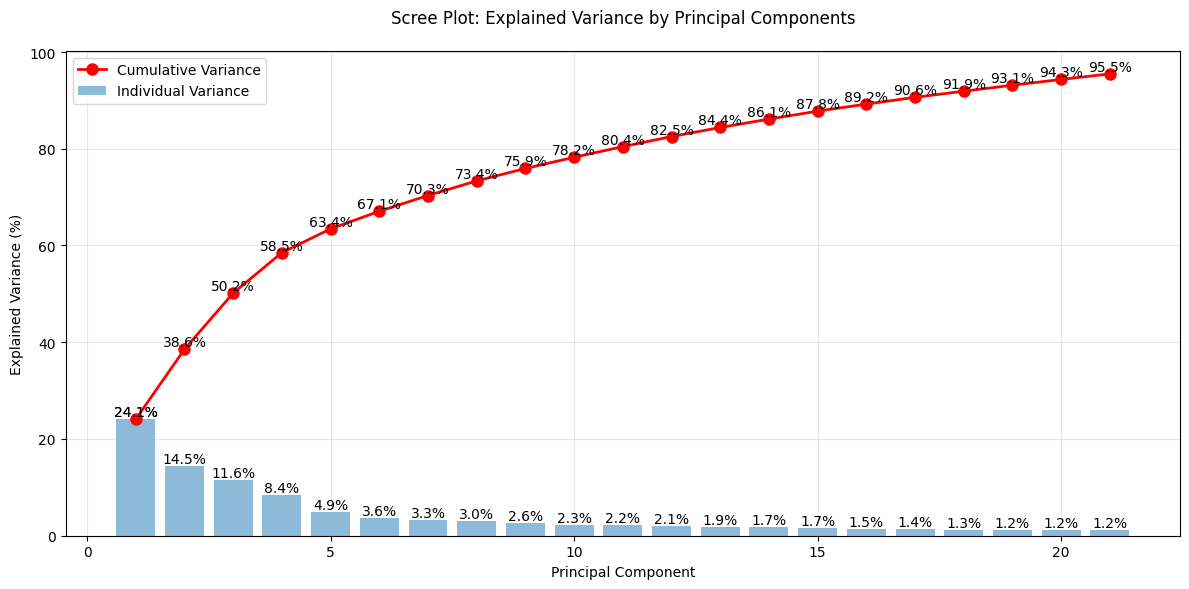

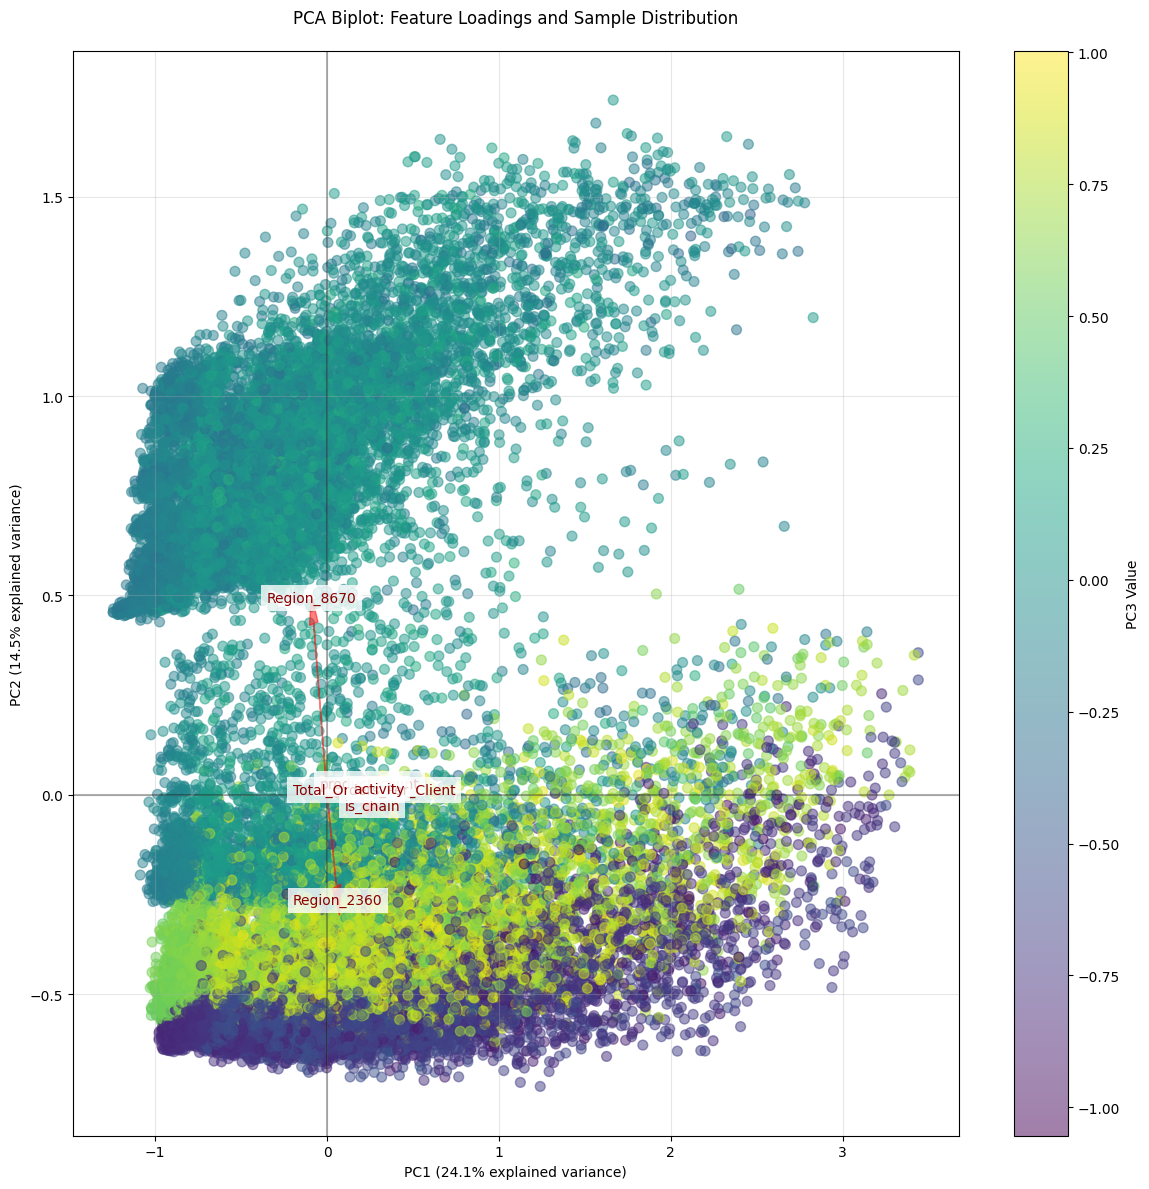


Principal Component Analysis Summary:
Total variance explained by 21 components: 95.5%

Principal Component 1 (24.1% variance explained):

Significant loadings (abs > 0.2):
activity: 0.326
Total_Orders_Per_Client: 0.296
is_chain: 0.285
product_count: 0.270
Orders_Afternoon: 0.238
Orders_Morning: 0.225
mnt: 0.220
vendor_count: 0.207

Principal Component 2 (14.5% variance explained):

Significant loadings (abs > 0.2):
Region_8670: 0.691
Region_2360: -0.370
CUI_Fastmeals: 0.314
Region_4660: -0.303
CUI_Asian: 0.278

Principal Component 3 (11.6% variance explained):

Significant loadings (abs > 0.2):
Region_4660: 0.706
Region_2360: -0.633

Principal Component 4 (8.4% variance explained):

Significant loadings (abs > 0.2):
payment_method_CARD: 0.944

Principal Component 5 (4.9% variance explained):

Significant loadings (abs > 0.2):
last_promo: 0.985

Principal Component 6 (3.6% variance explained):

Significant loadings (abs > 0.2):
CUI_Fastmeals: 0.543
activity: -0.394
frq: 0.336
CUI_Amer

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

def perform_pca_analysis(df_scaled, n_components=4, loading_threshold=0.2):
    """
    Perform PCA analysis with enhanced visualizations and insights

    Args:
        df_scaled: Scaled/normalized DataFrame
        n_components: Number of PCA components to calculate
        loading_threshold: Threshold for considering significant loadings
    """
    # Apply PCA
    pca = PCA(n_components=0.95)
    principal_components = pca.fit_transform(df_scaled)

    # Create DataFrame for principal components
    n_components = pca.n_components_
    pca_df = pd.DataFrame(
        data=principal_components,
        columns=[f'PC{i+1}' for i in range(n_components)]
    )

    # Calculate explained variance and cumulative variance
    explained_variance = pca.explained_variance_ratio_ * 100
    cumulative_variance = np.cumsum(explained_variance)

    # 1. Enhanced Scree Plot
    plt.figure(figsize=(12, 6))

    # Plot bars for individual variance
    plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5)

    # Plot line for cumulative variance
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance,
             'ro-', linewidth=2, markersize=8)

    plt.grid(True, alpha=0.3)
    plt.title('Scree Plot: Explained Variance by Principal Components', pad=20)
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance (%)')

    # Add value labels
    for i, (ev, cv) in enumerate(zip(explained_variance, cumulative_variance)):
        plt.text(i+1, ev, f'{ev:.1f}%', ha='center', va='bottom')
        plt.text(i+1, cv, f'{cv:.1f}%', ha='center', va='bottom')

    plt.legend(['Cumulative Variance', 'Individual Variance'])
    plt.tight_layout()
    plt.savefig('scree_plot.svg', format='svg', bbox_inches='tight')
    plt.show()

    # 2. Enhanced Biplot
    plt.figure(figsize=(12, 12))

    # Calculate loadings and scale them for visualization
    loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

    # Create scatter plot of samples
    scatter = plt.scatter(principal_components[:,0], principal_components[:,1],
                         c=principal_components[:,2], cmap='viridis',
                         alpha=0.5, s=50)
    plt.colorbar(scatter, label='PC3 Value')

    # Plot loadings (feature vectors)
    for i, (feature, loading) in enumerate(zip(df_scaled.columns, loadings)):
        # Only plot significant loadings
        if abs(loading[0]) > loading_threshold or abs(loading[1]) > loading_threshold:
            plt.arrow(0, 0, loading[0], loading[1],
                     color='r', alpha=0.5, head_width=0.05)

            # Adjust text position for better readability
            text_x = loading[0] * 1.15
            text_y = loading[1] * 1.15

            # Add background to text for better visibility
            plt.text(text_x, text_y, feature,
                    color='darkred', ha='center', va='center',
                    bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

    plt.grid(True, alpha=0.3)
    plt.xlabel(f'PC1 ({explained_variance[0]:.1f}% explained variance)')
    plt.ylabel(f'PC2 ({explained_variance[1]:.1f}% explained variance)')
    plt.title('PCA Biplot: Feature Loadings and Sample Distribution', pad=20)

    # Add axis lines
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

    plt.tight_layout()
    plt.savefig('biplot.svg', format='svg', bbox_inches='tight')
    plt.show()

    # 3. Print detailed loadings analysis
    print("\nPrincipal Component Analysis Summary:")
    print(f"Total variance explained by {n_components} components: {cumulative_variance[-1]:.1f}%")

    for i in range(n_components):
        print(f"\nPrincipal Component {i+1} ({explained_variance[i]:.1f}% variance explained):")

        # Sort loadings by absolute value
        loadings_dict = dict(zip(df_scaled.columns, pca.components_[i]))
        sorted_loadings = sorted(loadings_dict.items(),
                               key=lambda x: abs(x[1]),
                               reverse=True)

        # Print significant loadings
        print("\nSignificant loadings (abs > {}):".format(loading_threshold))
        for feature, loading in sorted_loadings:
            if abs(loading) > loading_threshold:
                print(f"{feature}: {loading:.3f}")

    return pca_df, pca

# Example usage:
pca_df, pca_model = perform_pca_analysis(df_scaled, n_components=4, loading_threshold=0.2)

/usr/local/lib/python3.10/dist-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


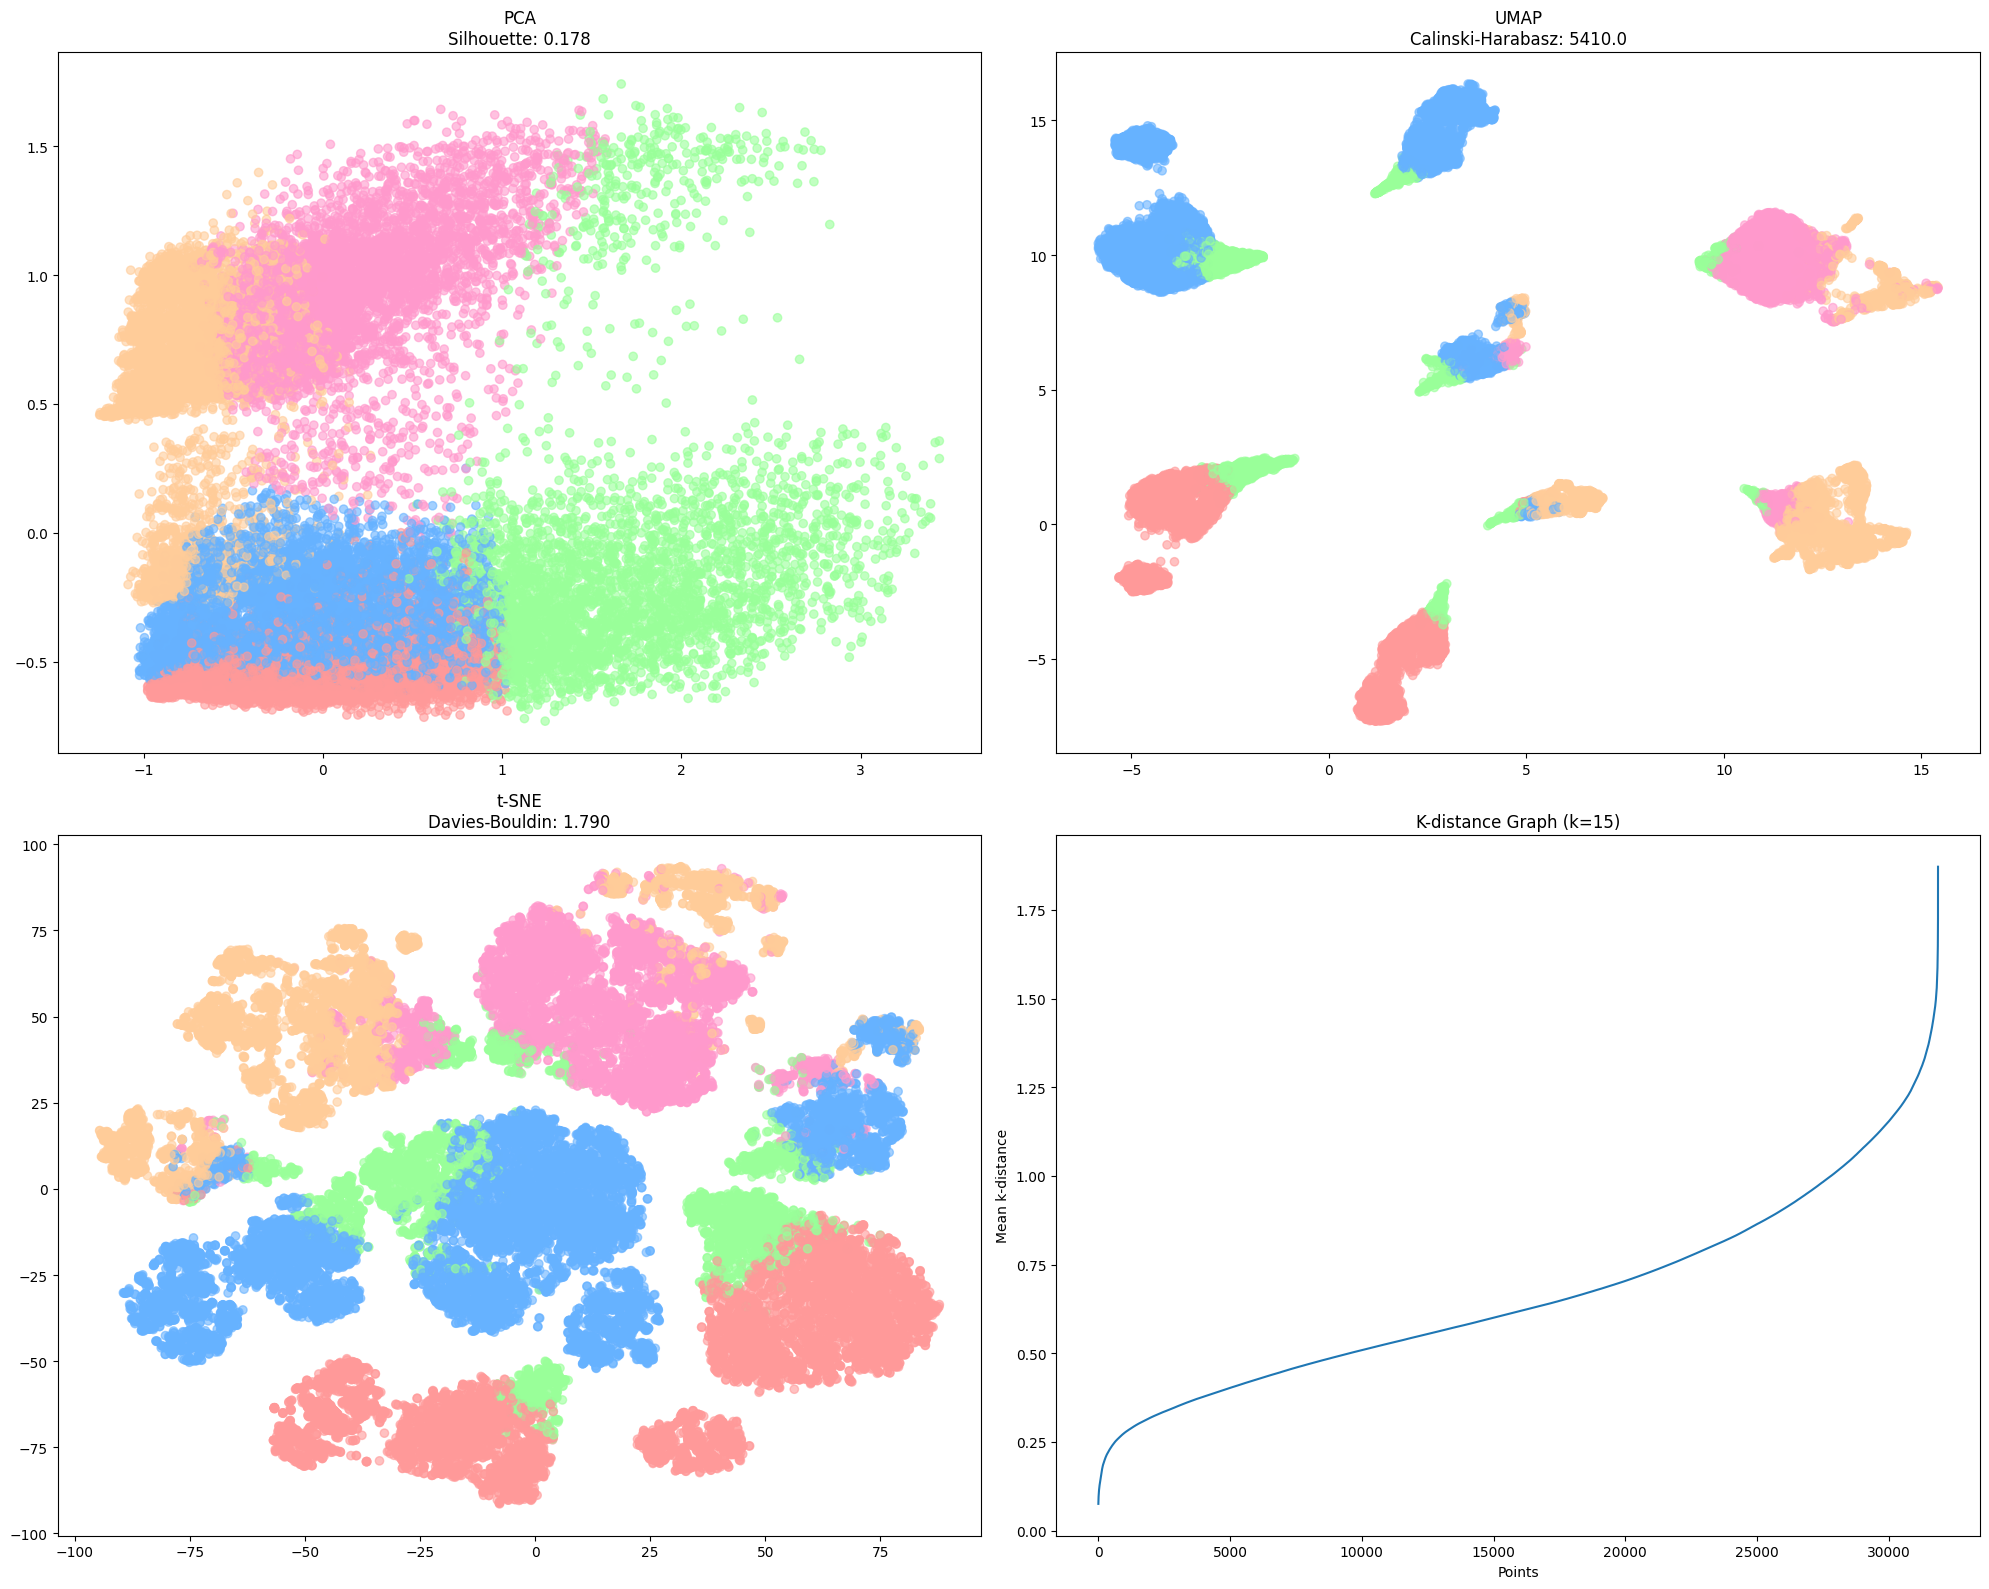

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import umap

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import umap

def dimensionality_analysis(df_scaled, n_neighbors=15, min_dist=0.1):
    """
    Perform dimensionality reduction analysis using PCA, UMAP, and t-SNE.
    """
    # PCA with 95% variance
    pca = PCA(n_components=0.95)
    pca_results = pca.fit_transform(df_scaled)

    # UMAP - fixed n_jobs parameter
    reducer = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        random_state=42,
        n_jobs=1
    )
    umap_results = reducer.fit_transform(df_scaled)

    # t-SNE
    tsne = TSNE(n_components=2, perplexity=30, random_state=42)
    tsne_results = tsne.fit_transform(df_scaled)

    # K-means clustering
    kmeans = KMeans(n_clusters=5, random_state=42)
    clusters = kmeans.fit_predict(pca_results)

    # Calculate quality scores
    scores = {
        'silhouette': silhouette_score(pca_results, clusters),
        'calinski': calinski_harabasz_score(pca_results, clusters),
        'davies': davies_bouldin_score(pca_results, clusters)
    }

    # Visualization
    colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC']
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))

    plot_params = [
        (pca_results, 'PCA', f'Silhouette: {scores["silhouette"]:.3f}'),
        (umap_results, 'UMAP', f'Calinski-Harabasz: {scores["calinski"]:.1f}'),
        (tsne_results, 't-SNE', f'Davies-Bouldin: {scores["davies"]:.3f}')
    ]

    for idx, (results, title, score) in enumerate(plot_params):
        row, col = divmod(idx, 2)
        axes[row, col].scatter(
            results[:, 0],
            results[:, 1],
            c=[colors[c] for c in clusters],
            alpha=0.6
        )
        axes[row, col].set_title(f'{title}\n{score}')

    # K-distance plot
    nbrs = NearestNeighbors(n_neighbors=n_neighbors).fit(pca_results)
    distances, _ = nbrs.kneighbors(pca_results)
    dist = np.sort(distances, axis=0)
    axes[1, 1].plot(dist[:, 1:].mean(axis=1))
    axes[1, 1].set_title(f'K-distance Graph (k={n_neighbors})')
    axes[1, 1].set_xlabel('Points')
    axes[1, 1].set_ylabel('Mean k-distance')

    plt.tight_layout()
    plt.savefig('dimensionality_analysis.svg', format='svg', bbox_inches='tight')
    plt.show()

    return {
        'pca': pca_results,
        'umap': umap_results,
        'tsne': tsne_results,
        'clusters': clusters,
        'scores': scores
    }
# Example usage:
results = dimensionality_analysis(df_scaled)

a silhouette score of 0.111 is quite low. Generally:

< 0.25: Poor clustering
0.25-0.50: Fair clustering


0.50: Good clustering



To improve:

Try different numbers of clusters (3-7)
Feature selection/reduction
Test different clustering algorithms (DBSCAN, Agglomerative)
Handle outliers more aggressively
Consider normalizing instead of standardizing

Would you like me to implement any of these approaches?

In [20]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from scipy.cluster.hierarchy import dendrogram, linkage
# from scipy.stats import spearmanr

# # Generate sample data
# np.random.seed(42)
# n_samples = 100
# n_features = 10

# # Create sample feature names
# feature_names = [
#     'Total_Orders_Per_Client', 'product_count', 'activity', 'vendor_count',
#     'mnt', 'Monetary_Score', 'mnt_Per_Order', 'Region_8670',
#     'Orders_Morning', 'Orders_Evening'
# ]

# # Generate sample data
# data = pd.DataFrame(
#     np.random.randn(n_samples, n_features),
#     columns=feature_names
# )

# # Create correlation matrix
# corr_matrix = data.corr()

# # Generate sample PCA loadings
# loadings = pd.DataFrame(
#     np.random.randn(n_features, 3) / 2,
#     index=feature_names,
#     columns=['PC1', 'PC2', 'PC3']
# )

# def plot_feature_relationships_fixed(correlation_matrix, loadings):
#     """
#     Plot feature relationships with handling for infinite/nan values
#     """
#     # Create separate figures for better control
#     plt.figure(figsize=(15, 10))

#     # Handle infinite values in correlation matrix
#     correlation_matrix_clean = correlation_matrix.fillna(0)

#     # Filter out features with zero variance (constant features)
#     var_mask = correlation_matrix_clean.var() != 0
#     correlation_matrix_filtered = correlation_matrix_clean.loc[var_mask, var_mask]

#     # Create distance matrix
#     distance_matrix = 1 - np.abs(correlation_matrix_filtered)

#     try:
#         # Create linkage matrix for hierarchical clustering
#         linkage_matrix = linkage(distance_matrix, method='ward')

#         # Plot dendrogram
#         dendrogram(linkage_matrix, labels=correlation_matrix_filtered.columns,
#                   leaf_rotation=90)
#         plt.title('Feature Clustering by Correlation\n(Excluding Constant Features)')
#         plt.tight_layout()
#         plt.savefig('feature_clustering.svg', format='svg', bbox_inches='tight')
#         plt.show()
#     except Exception as e:
#         print(f"Could not create dendrogram due to: {str(e)}")
#         print("Proceeding with heatmap visualization...")

#     # Plot loading heatmap
#     plt.figure(figsize=(15, 12))

#     # Filter out near-zero loadings for clarity
#     loadings_plot = loadings.copy()
#     significant_features = (loadings_plot.abs() > 0.2).any(axis=1)
#     loadings_significant = loadings_plot[significant_features]

#     # Create heatmap
#     sns.heatmap(loadings_significant,
#                 annot=True,
#                 cmap='RdBu',
#                 center=0,
#                 fmt='.2f',
#                 cbar_kws={'label': 'Loading Strength'})

#     plt.title('PCA Loading Heatmap\n(Showing Features with Loadings > 0.2)')
#     plt.xticks(rotation=0)
#     plt.yticks(rotation=0)
#     plt.tight_layout()
#     plt.savefig('loading_heatmap.svg', format='svg', bbox_inches='tight')
#     plt.show()

#     # Additional visualization: Feature importance plot
#     plt.figure(figsize=(12, 8))

#     # Calculate overall importance (mean absolute loading across components)
#     importance = loadings_plot.abs().mean(axis=1)
#     importance = importance[importance > 0.1]  # Filter out low importance features
#     importance = importance.sort_values(ascending=True)

#     # Create horizontal bar plot
#     importance.plot(kind='barh')
#     plt.title('Feature Importance\n(Mean Absolute Loading Across Components)')
#     plt.xlabel('Mean Absolute Loading')
#     plt.tight_layout()
#     plt.savefig('feature_importance.svg', format='svg', bbox_inches='tight')
#     plt.show()

#     # Print suggested feature reductions
#     print("\n=== SUGGESTED FEATURE REDUCTION STRATEGY ===")

#     # Group features based on importance scores
#     high_importance = importance[importance > 0.3].index.tolist()
#     medium_importance = importance[(importance > 0.2) & (importance <= 0.3)].index.tolist()
#     low_importance = importance[importance <= 0.2].index.tolist()

#     print("\nHigh importance features to keep:")
#     for feature in high_importance:
#         print(f"   - {feature}")

#     print("\nConsider combining or reducing dimensionality of:")
#     for feature in medium_importance:
#         print(f"   - {feature}")

#     print("\nConsider dropping (low importance):")
#     for feature in low_importance:
#         print(f"   - {feature}")

# # Run the analysis
# plot_feature_relationships_fixed(corr_matrix, loadings)


# # Example usage:
# plot_feature_relationships_fixed(corr_matrix, loadings)

In [21]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from scipy.cluster.hierarchy import dendrogram, linkage
# from scipy.stats import spearmanr

# def plot_feature_relationships_fixed(correlation_matrix, loadings):
#     # [Previous code remains the same until the print statements]

#     # Calculate overall importance (mean absolute loading across components)
#     loadings_plot = loadings.iloc[:, :-1].copy()  # Exclude 'pattern' column
#     importance = loadings_plot.abs().mean(axis=1)

#     # Sort all features by importance
#     importance_sorted = importance.sort_values(ascending=True)

#     # Print suggested feature reductions
#     print("\n=== SUGGESTED FEATURE REDUCTION STRATEGY ===")
#     print("\nBased on the analysis, you could reduce dimensions by:")

#     # [Previous group prints remain the same]

#     # Print features by importance thresholds
#     print("\n=== FEATURE IMPORTANCE BREAKDOWN ===")

#     # Very low importance features (< 0.1)
#     print("\n5a. Very Low Importance Features (loading < 0.1):")
#     very_low_importance = importance_sorted[importance_sorted < 0.1]
#     for feature, value in very_low_importance.items():
#         print(f"   - {feature}: {value:.3f}")

#     # Low importance features (0.1 - 0.2)
#     print("\n5b. Low Importance Features (0.1 <= loading < 0.2):")
#     low_importance = importance_sorted[(importance_sorted >= 0.1) & (importance_sorted < 0.2)]
#     for feature, value in low_importance.items():
#         print(f"   - {feature}: {value:.3f}")

#     # Medium importance features (0.2 - 0.3)
#     print("\n5c. Medium Importance Features (0.2 <= loading < 0.3):")
#     medium_importance = importance_sorted[(importance_sorted >= 0.2) & (importance_sorted < 0.3)]
#     for feature, value in medium_importance.items():
#         print(f"   - {feature}: {value:.3f}")

#     # High importance features (>= 0.3)
#     print("\n5d. High Importance Features (loading >= 0.3):")
#     high_importance = importance_sorted[importance_sorted >= 0.3]
#     for feature, value in high_importance.items():
#         print(f"   - {feature}: {value:.3f}")

#     # Summary statistics
#     print("\n=== SUMMARY STATISTICS ===")
#     print(f"Total features: {len(importance_sorted)}")
#     print(f"Features with loading < 0.1: {len(very_low_importance)}")
#     print(f"Features with loading 0.1-0.2: {len(low_importance)}")
#     print(f"Features with loading 0.2-0.3: {len(medium_importance)}")
#     print(f"Features with loading >= 0.3: {len(high_importance)}")

#     return importance_sorted

# # Example usage:
# importance_sorted = plot_feature_relationships_fixed(corr_matrix, loadings)

**List features with near-zero loadings across multiple PCs.**

Example: CUI_Beverages, CUI_Cafe, CUI_Chicken_Dishes, CUI_Chinese, CUI_Desserts, CUI_Healthy, CUI_Indian, CUI_Italian, CUI_Japanese, CUI_Noodle_Dishes, CUI_OTHER, CUI_Street_Food/Snacks, CUI_Thai, Orders_Night, Orders_Dawn, Orders_Dusk, mnt_Per_Order, Items_Per_Order, frq, rcn, Recency_Score, Frequency_Score, Monetary_Score, CLV_Score.

**Combine Related Features:**

Cuisine Categories: Combine CUI_Beverages, CUI_Cafe, CUI_Chicken_Dishes, etc., into a single feature like CUI_General.

Temporal Ordering: Combine Orders_Night, Orders_Dawn, Orders_Dusk into a single feature like Orders_Inactive_Periods.

RFM Scores: Combine Recency_Score, Frequency_Score, Monetary_Score into a single RFM_Score.

**Drop Irrelevant Features:**

Drop features that are not contributing to the variance and are not related to other features.

Example: mnt_Per_Order, Items_Per_Order, frq, rcn, CLV_Score.

**Model Convergence:**

Training loss decreased from 1.1 to 0.5
Validation loss decreased from 1.0 to 0.55
Stable convergence after ~150 epochs


Overfitting Assessment:


Loss difference stabilizes at -0.05
Small but persistent gap between training and validation loss
Suggests mild underfitting rather than overfitting


Reconstruction Error:


Right-skewed distribution
Most errors concentrated between 0.25-0.5
Long tail extending to 1.75
Indicates reasonable reconstruction for majority of samples

Recommendations:

Increase model capacity slightly (wider layers)
Reduce regularization strength
Consider increasing encoding dimensions to 12-16
Use cyclical learning rate

Epoch 1/200
200/200 - 5s - loss: 0.1191 - val_loss: 0.0367 - lr: 0.0010 - 5s/epoch - 23ms/step
Epoch 2/200
200/200 - 1s - loss: 0.0341 - val_loss: 0.0275 - lr: 0.0010 - 1s/epoch - 7ms/step
Epoch 3/200
200/200 - 1s - loss: 0.0301 - val_loss: 0.0235 - lr: 0.0010 - 1s/epoch - 7ms/step
Epoch 4/200
200/200 - 1s - loss: 0.0273 - val_loss: 0.0221 - lr: 0.0010 - 1s/epoch - 7ms/step
Epoch 5/200
200/200 - 1s - loss: 0.0248 - val_loss: 0.0224 - lr: 0.0010 - 1s/epoch - 7ms/step
Epoch 6/200
200/200 - 1s - loss: 0.0231 - val_loss: 0.0198 - lr: 0.0010 - 1s/epoch - 7ms/step
Epoch 7/200
200/200 - 1s - loss: 0.0215 - val_loss: 0.0176 - lr: 0.0010 - 1s/epoch - 7ms/step
Epoch 8/200
200/200 - 1s - loss: 0.0200 - val_loss: 0.0169 - lr: 0.0010 - 1s/epoch - 7ms/step
Epoch 9/200
200/200 - 1s - loss: 0.0190 - val_loss: 0.0164 - lr: 0.0010 - 1s/epoch - 7ms/step
Epoch 10/200
200/200 - 1s - loss: 0.0181 - val_loss: 0.0172 - lr: 0.0010 - 1s/epoch - 7ms/step
Epoch 11/200
200/200 - 1s - loss: 0.0174 - val_loss: 0.015

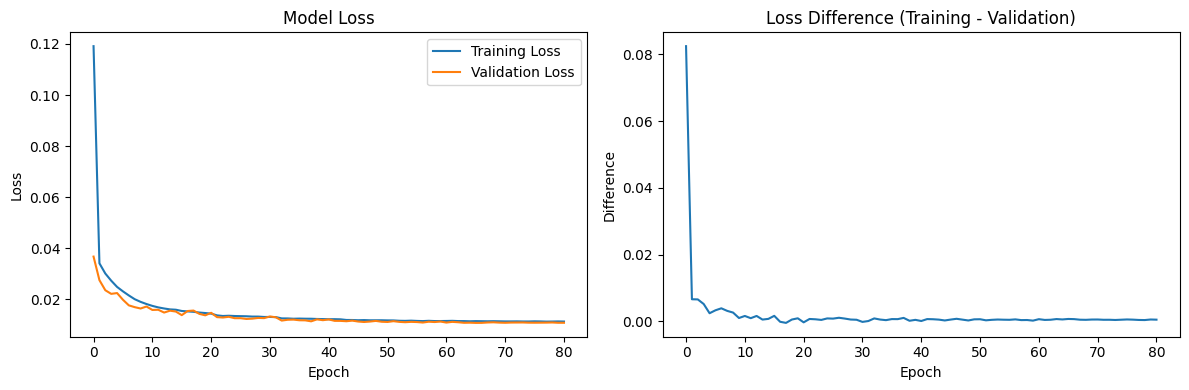

997/997 [==============================] - 2s 2ms/step


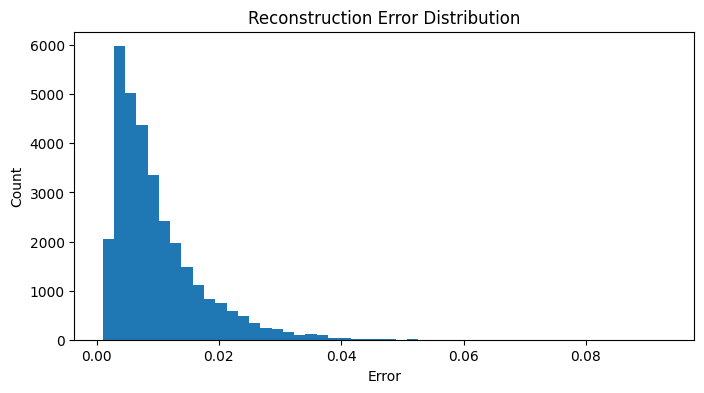

Mean reconstruction error: 0.0098
Std reconstruction error: 0.0072


In [22]:
import tensorflow as tf
from tensorflow.keras import layers, Model
import numpy as np
import matplotlib.pyplot as plt

def create_improved_autoencoder(input_dim, encoding_dim=8):
    # Adjust encoding dimension for 2 clusters
    encoding_dim = 8  # Reduced from 16 to prevent overcomplex representations

    inputs = layers.Input(shape=(input_dim,))

    # Encoder
    # Gradually reduce dimensions with larger initial layers
    x = layers.Dense(256, kernel_initializer='he_uniform')(inputs)
    x = layers.LeakyReLU(alpha=0.2)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.1)(x)  # Reduced dropout

    x = layers.Dense(128, kernel_initializer='he_uniform')(x)
    x = layers.LeakyReLU(alpha=0.2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.Dense(64, kernel_initializer='he_uniform')(x)
    x = layers.LeakyReLU(alpha=0.2)(x)
    x = layers.BatchNormalization()(x)

    # Bottleneck with L1 regularization for better cluster separation
    encoded = layers.Dense(encoding_dim,
                         activation='tanh',  # Changed to tanh for better boundary learning
                         activity_regularizer=tf.keras.regularizers.l1(1e-4),
                         name='encoder_output')(x)

    # Decoder
    x = layers.Dense(64, kernel_initializer='he_uniform')(encoded)
    x = layers.LeakyReLU(alpha=0.2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.Dense(128, kernel_initializer='he_uniform')(x)
    x = layers.LeakyReLU(alpha=0.2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.Dense(256, kernel_initializer='he_uniform')(x)
    x = layers.LeakyReLU(alpha=0.2)(x)
    x = layers.BatchNormalization()(x)

    decoded = layers.Dense(input_dim, activation='linear')(x)

    autoencoder = Model(inputs, decoded)
    encoder = Model(inputs, encoded)

    return autoencoder, encoder

# Training setup with improved parameters
def train_autoencoder(df_scaled, batch_size=64, epochs=300):
    autoencoder, encoder = create_improved_autoencoder_v2(df_scaled.shape[1])

    # Custom learning rate schedule
    initial_learning_rate = 0.001
    decay_steps = 1000
    decay_rate = 0.9

    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate,
        decay_steps=decay_steps,
        decay_rate=decay_rate,
        staircase=True)

    optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

    # Custom loss function combining MSE with feature clustering
    def custom_loss(y_true, y_pred):
        mse_loss = tf.keras.losses.mse(y_true, y_pred)
        # Add clustering loss term
        encoding_layer = autoencoder.get_layer('encoder_output')
        encoding_weights = encoding_layer.weights[0]
        clustering_loss = 0.01 * tf.reduce_mean(tf.abs(encoding_weights))
        return mse_loss + clustering_loss

    autoencoder.compile(optimizer=optimizer, loss=custom_loss)

    # Modified callbacks
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=20,
        restore_best_weights=True,
        min_delta=1e-5
    )

    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.7,  # Less aggressive reduction
        patience=7,
        min_lr=1e-6,
        verbose=1
    )

    # Add learning rate warmup
    class WarmUpCallback(tf.keras.callbacks.Callback):
        def __init__(self, warmup_epochs=5):
            super(WarmUpCallback, self).__init__()
            self.warmup_epochs = warmup_epochs

        def on_epoch_begin(self, epoch, logs=None):
            if epoch < self.warmup_epochs:
                lr = initial_learning_rate * ((epoch + 1) / self.warmup_epochs)
                tf.keras.backend.set_value(self.model.optimizer.lr, lr)

    # Train with modified parameters
    history = autoencoder.fit(
        df_scaled, df_scaled,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.2,
        callbacks=[early_stopping, reduce_lr, WarmUpCallback()],
        verbose=2,
        shuffle=True
    )

    return autoencoder, encoder, history
# Setup model and training
autoencoder, encoder = create_improved_autoencoder(df_scaled.shape[1])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
autoencoder.compile(optimizer=optimizer, loss='mse')

early_stopping = tf.keras.callbacks.EarlyStopping(
   monitor='val_loss',
   patience=15,
   restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
   monitor='val_loss',
   factor=0.5,
   patience=5,
   min_lr=1e-6,
   verbose=1
)

# Train model
history = autoencoder.fit(
   df_scaled, df_scaled,
   epochs=200,
   batch_size=128,
   validation_split=0.2,
   callbacks=[early_stopping, reduce_lr],
   verbose=2
)

# Plot training results
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(np.subtract(history.history['loss'], history.history['val_loss']))
plt.title('Loss Difference (Training - Validation)')
plt.xlabel('Epoch')
plt.ylabel('Difference')
plt.tight_layout()
plt.show()

# Analyze results
encoded_data = encoder.predict(df_scaled)
reconstruction = autoencoder.predict(df_scaled)
reconstruction_error = np.mean(np.power(df_scaled - reconstruction, 2), axis=1)

plt.figure(figsize=(8, 4))
plt.hist(reconstruction_error, bins=50)
plt.title('Reconstruction Error Distribution')
plt.xlabel('Error')
plt.ylabel('Count')
plt.show()

print(f"Mean reconstruction error: {np.mean(reconstruction_error):.4f}")
print(f"Std reconstruction error: {np.std(reconstruction_error):.4f}")

In [1]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import pandas as pd
import matplotlib.pyplot as plt
from time import time

n_iterations = 250
total_points = len(encoded_data)
print(f"Starting random parameter search with {n_iterations} iterations...")
start_time = time()

np.random.seed(42)
params = []
for _ in range(n_iterations):
    eps = np.exp(np.random.uniform(low=np.log(0.001), high=np.log(1.0)))
    min_samples = np.random.randint(2, 21)
    params.append((eps, min_samples))

best_silhouette = -1
results = []

print("\nTesting parameter combinations:")
for i, (eps, min_samples) in enumerate(params):
    if i % 10 == 0:
        elapsed = time() - start_time
        print(f"Progress: {i}/{n_iterations} combinations tested ({elapsed:.1f}s elapsed)")
        if i > 0:
            print(f"Best silhouette score so far: {best_silhouette:.3f}")

    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(encoded_data)

    mask = clusters != -1
    n_clusters = len(np.unique(clusters[mask]))
    noise_points = np.sum(clusters == -1)
    points_in_clusters = total_points - noise_points

    # More stringent validation criteria
    valid_clustering = (
        n_clusters >= 2 and                     # At least 2 clusters
        points_in_clusters >= total_points * 0.1 and  # At least 10% of points in clusters
        noise_points <= total_points * 0.9      # At most 90% noise
    )

    if valid_clustering:
        try:
            silhouette = silhouette_score(encoded_data[mask], clusters[mask])
            calinski = calinski_harabasz_score(encoded_data[mask], clusters[mask])
            davies = davies_bouldin_score(encoded_data[mask], clusters[mask])

            if silhouette > best_silhouette:
                best_silhouette = silhouette
                print(f"\nNew best silhouette score: {silhouette:.3f}")
                print(f"Parameters: eps={eps:.6f}, min_samples={min_samples}")
                print(f"Clusters: {n_clusters}, Points in clusters: {points_in_clusters}")
                print(f"Noise: {noise_points} points ({noise_points/total_points*100:.1f}%)")

        except Exception as e:
            print(f"\nError calculating metrics: {str(e)}")
            silhouette = calinski = davies = None
    else:
        silhouette = calinski = davies = None

    results.append({
        'min_samples': min_samples,
        'eps': eps,
        'n_clusters': n_clusters,
        'noise_points': noise_points,
        'points_in_clusters': points_in_clusters,
        'noise_ratio': noise_points / total_points,
        'silhouette': silhouette,
        'calinski_harabasz': calinski,
        'davies_bouldin': davies
    })

total_time = time() - start_time
print(f"\nSearch completed in {total_time:.1f} seconds")

results_df = pd.DataFrame(results)
valid_results = results_df[
    (results_df['silhouette'].notna()) &
    (results_df['points_in_clusters'] >= total_points * 0.1) &  # At least 10% points in clusters
    (results_df['noise_ratio'] <= 0.9) &                        # At most 90% noise
    (results_df['n_clusters'] >= 2)                            # At least 2 clusters
].sort_values(['silhouette', 'calinski_harabasz'], ascending=[False, False])

print("\nTop 10 Results:")
print(valid_results.head(10).to_string(index=False))

if len(valid_results) > 0:
    best_row = valid_results.iloc[0]
    best_dbscan = DBSCAN(eps=best_row['eps'], min_samples=int(best_row['min_samples']))
    best_clusters = best_dbscan.fit_predict(encoded_data)

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.scatter(encoded_data[:, 0], encoded_data[:, 1], c=best_clusters, cmap='viridis')
    plt.colorbar(label='Cluster')
    plt.title(f'Best Clusters\neps={best_row["eps"]:.6f}, min_samples={int(best_row["min_samples"])}\n' +
              f'silhouette={best_row["silhouette"]:.3f}, n_clusters={best_row["n_clusters"]}')

    plt.subplot(1, 3, 2)
    valid_mask = results_df['silhouette'].notna()
    sc = plt.scatter(results_df[valid_mask]['eps'],
                    results_df[valid_mask]['min_samples'],
                    c=results_df[valid_mask]['silhouette'],
                    cmap='viridis')
    plt.colorbar(sc, label='Silhouette Score')
    plt.xscale('log')
    plt.xlabel('eps')
    plt.ylabel('min_samples')
    plt.title('Silhouette Scores')

    plt.subplot(1, 3, 3)
    sc = plt.scatter(results_df[valid_mask]['eps'],
                    results_df[valid_mask]['min_samples'],
                    c=results_df[valid_mask]['points_in_clusters'],
                    cmap='viridis')
    plt.colorbar(sc, label='Points in Clusters')
    plt.xscale('log')
    plt.xlabel('eps')
    plt.ylabel('min_samples')
    plt.title('Cluster Coverage')

    plt.tight_layout()
    plt.show()

    print("\nBest Configuration Metrics:")
    print(f"Silhouette Score: {best_row['silhouette']:.3f}")
    print(f"Calinski-Harabasz Score: {best_row['calinski_harabasz']:.3f}")
    print(f"Davies-Bouldin Score: {best_row['davies_bouldin']:.3f}")
    print(f"Number of Clusters: {best_row['n_clusters']}")
    print(f"Points in Clusters: {best_row['points_in_clusters']} ({(1-best_row['noise_ratio'])*100:.1f}%)")
    print(f"Noise Points: {best_row['noise_points']} ({best_row['noise_ratio']*100:.1f}%)")
else:
    print("No valid clusters found meeting criteria")

NameError: name 'encoded_data' is not defined

In [25]:
def optimize_dbscan_improved(data):
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs = neigh.fit(data)
    distances, _ = nbrs.kneighbors(data)
    distances = np.sort(distances[:,1])

    # Calculate base eps from elbow point
    acceleration = np.diff(distances, 2)
    elbow_index = np.argmax(acceleration) + 2
    base_eps = distances[elbow_index]

    # Wider eps range around elbow point
    eps_values = np.linspace(base_eps * 0.5, base_eps * 3, 20)
    min_samples_range = range(10, 51, 5)

    best_score = -1
    best_params = None
    best_labels = None

    print("Testing parameter combinations...")

    for min_samples in min_samples_range:
        for eps in eps_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(data)

            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            n_noise = list(labels).count(-1)

            if 2 <= n_clusters <= 20 and n_noise < len(labels) * 0.4:
                try:
                    score = silhouette_score(data, labels)
                    if score > best_score:
                        best_score = score
                        best_params = {'eps': eps, 'min_samples': min_samples}
                        best_labels = labels
                        print(f"New best - eps: {eps:.4f}, min_samples: {min_samples}, "
                              f"score: {score:.3f}, clusters: {n_clusters}, "
                              f"noise: {n_noise/len(labels)*100:.1f}%")
                except:
                    continue

    return best_params, best_labels

best_params, best_labels = optimize_dbscan_improved(all_encoded_data)

NameError: name 'all_encoded_data' is not defined

In [ ]:
!pip install minisom

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN, AgglomerativeClustering, OPTICS
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import NearestNeighbors
from minisom import MiniSom

class ClusteringOptimizer:
    def __init__(self, data, random_state=42):
        self.data = data
        self.random_state = random_state
        self.best_model = None
        self.best_labels = None
        self.metrics = {}

    def find_optimal_eps(self, data):
        """Find optimal eps parameter for DBSCAN using k-distance graph"""
        neigh = NearestNeighbors(n_neighbors=2)
        nbrs = neigh.fit(data)
        distances, indices = nbrs.kneighbors(data)
        distances = np.sort(distances, axis=0)
        distances = distances[:,1]

        plt.figure(figsize=(10, 6))
        plt.plot(np.arange(len(distances)), np.sort(distances))
        plt.xlabel('Points')
        plt.ylabel('k-distance')
        plt.title('k-distance graph')
        plt.show()

        acceleration = np.diff(distances, 2)
        elbow_index = np.argmax(acceleration) + 2
        return distances[elbow_index]

    def evaluate_clustering(self, data, labels):
        """Calculate multiple clustering validation metrics"""
        if len(np.unique(labels)) < 2:
            return {
                'silhouette': -np.inf,
                'davies_bouldin': np.inf,
                'calinski_harabasz': -np.inf
            }

        metrics = {
            'silhouette': silhouette_score(data, labels),
            'davies_bouldin': davies_bouldin_score(data, labels),
            'calinski_harabasz': calinski_harabasz_score(data, labels)
        }
        return metrics

    def train_som(self, size, sigma, learning_rate):
        """Train SOM and return cluster labels"""
        som = MiniSom(size, size, self.data.shape[1], sigma=sigma,
                     learning_rate=learning_rate, random_seed=self.random_state)
        som.random_weights_init(self.data)
        som.train(self.data, 1000)  # Train for 1000 iterations

        # Get cluster labels
        labels = np.array([som.winner(x) for x in self.data])
        labels = np.ravel_multi_index(labels.T, (size, size))
        return labels, som

    def try_multiple_algorithms(self, k_range=(2, 11)):
        """Try multiple clustering algorithms including SOM"""
        results = []

        # 1. SOM with different grid sizes and parameters
        print("Testing SOM clustering...")
        grid_sizes = [2, 3, 4, 5]  # Different grid sizes to test
        sigmas = [0.5, 1.0]
        learning_rates = [0.5, 0.1]

        for size in grid_sizes:
            for sigma in sigmas:
                for learning_rate in learning_rates:
                    labels, som = self.train_som(size, sigma, learning_rate)
                    metrics = self.evaluate_clustering(self.data, labels)
                    results.append({
                        'algorithm': 'SOM',
                        'params': {
                            'grid_size': size,
                            'sigma': sigma,
                            'learning_rate': learning_rate
                        },
                        'labels': labels,
                        'metrics': metrics,
                        'model': som
                    })
                    print(f"Grid={size}x{size}, σ={sigma}, lr={learning_rate}: "
                          f"Silhouette={metrics['silhouette']:.3f}")

        # 2. DBSCAN with optimal eps
        print("\nTesting DBSCAN clustering...")
        eps = self.find_optimal_eps(self.data)
        for min_samples in [5, 10, 15]:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(self.data)
            if len(np.unique(labels)) > 1:
                metrics = self.evaluate_clustering(self.data, labels)
                results.append({
                    'algorithm': 'DBSCAN',
                    'params': {'eps': eps, 'min_samples': min_samples},
                    'labels': labels,
                    'metrics': metrics,
                    'model': dbscan
                })
                print(f"min_samples={min_samples}: Silhouette={metrics['silhouette']:.3f}")

        # 3. OPTICS
        print("\nTesting OPTICS clustering...")
        for min_samples in [5, 10, 15]:
            optics = OPTICS(min_samples=min_samples)
            labels = optics.fit_predict(self.data)
            if len(np.unique(labels)) > 1:
                metrics = self.evaluate_clustering(self.data, labels)
                results.append({
                    'algorithm': 'OPTICS',
                    'params': {'min_samples': min_samples},
                    'labels': labels,
                    'metrics': metrics,
                    'model': optics
                })
                print(f"min_samples={min_samples}: Silhouette={metrics['silhouette']:.3f}")

        # 4. Hierarchical Clustering
        print("\nTesting Hierarchical clustering...")
        for k in range(k_range[0], k_range[1]):
            hierarchical = AgglomerativeClustering(n_clusters=k)
            labels = hierarchical.fit_predict(self.data)
            metrics = self.evaluate_clustering(self.data, labels)
            results.append({
                'algorithm': 'Hierarchical',
                'params': {'n_clusters': k},
                'labels': labels,
                'metrics': metrics,
                'model': hierarchical
            })
            print(f"K={k}: Silhouette={metrics['silhouette']:.3f}")

        # Find best model
        best_result = max(results, key=lambda x: x['metrics']['silhouette'])
        self.best_model = best_result['model']
        self.best_labels = best_result['labels']
        self.metrics = best_result['metrics']

        return results

    def visualize_som_grid(self, som, size):
        """Visualize SOM grid"""
        plt.figure(figsize=(10, 10))
        plt.pcolor(som.distance_map().T, cmap='bone_r')
        plt.colorbar()
        plt.title('SOM Grid U-matrix')
        plt.show()

    def visualize_results(self, results):
        """Create comprehensive visualization of clustering results"""
        plt.figure(figsize=(20, 15))

        # 1. PCA visualization of best clustering
        plt.subplot(2, 2, 1)
        pca = PCA(n_components=2)
        pca_result = pca.fit_transform(self.data)
        scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1],
                            c=self.best_labels, cmap='viridis')
        plt.colorbar(scatter)
        plt.title(f'Best Clustering Result\n'
                 f'Algorithm: {self.best_model.__class__.__name__}\n'
                 f'Silhouette Score: {self.metrics["silhouette"]:.3f}')

        # 2. Algorithm comparison
        plt.subplot(2, 2, 2)
        algorithm_scores = {}
        for result in results:
            algo_name = f"{result['algorithm']}\n{str(result['params'])}"
            score = result['metrics']['silhouette']
            algorithm_scores[algo_name] = score

        algorithm_scores = dict(sorted(algorithm_scores.items(), key=lambda x: x[1], reverse=True))
        plt.bar(range(len(algorithm_scores)), algorithm_scores.values())
        plt.xticks(range(len(algorithm_scores)), algorithm_scores.keys(), rotation=45, ha='right')
        plt.title('Silhouette Score by Algorithm and Parameters')

        # 3. Cluster size distribution
        plt.subplot(2, 2, 3)
        unique, counts = np.unique(self.best_labels, return_counts=True)
        plt.bar([f'Cluster {i}' for i in unique], counts)
        plt.title('Cluster Size Distribution')
        plt.xticks(rotation=45)

        # 4. 3D PCA visualization
        plt.subplot(2, 2, 4, projection='3d')
        pca = PCA(n_components=3)
        pca_result = pca.fit_transform(self.data)
        scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2],
                            c=self.best_labels, cmap='viridis')
        plt.title('3D PCA Visualization')

        plt.tight_layout()
        plt.show()

        # If best model is SOM, show the U-matrix
        if isinstance(self.best_model, MiniSom):
            self.visualize_som_grid(self.best_model,
                                  self.best_labels.max() + 1)

        # Print detailed metrics
        print("\nBest Clustering Results:")
        print(f"Algorithm: {self.best_model.__class__.__name__}")
        print(f"Parameters: {best_result['params']}")
        print("\nMetrics:")
        for metric, value in self.metrics.items():
            print(f"{metric}: {value:.3f}")

# Usage
optimizer = ClusteringOptimizer(all_encoded_data)
results = optimizer.try_multiple_algorithms()
optimizer.visualize_results(results)

# Get the best clustering results
best_labels = optimizer.best_labels
best_metrics = optimizer.metrics

# Update clustering dataframe
clustering_df = pd.DataFrame(all_encoded_data, columns=encoded_cols)
clustering_df['cluster'] = best_labels
clustering_df['reconstruction_error'] = reconstruction_error

print("\nCluster Distribution:")
print(pd.Series(best_labels).value_counts().sort_index())

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score

# # Get encoded data for all epochs
# all_encoded_data = encoder.predict(df_scaled)

# # Determine optimal number of clusters using silhouette score
# silhouette_scores = []
# K = range(2, 11)
# for k in K:
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(all_encoded_data)
#     score = silhouette_score(all_encoded_data, kmeans.labels_)
#     silhouette_scores.append(score)

# # Plot silhouette scores
# plt.figure(figsize=(10, 6))
# plt.plot(K, silhouette_scores, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Silhouette Score')
# plt.title('Silhouette Score vs Cluster Numbers')
# plt.show()

# # Use optimal k for final clustering
# optimal_k = K[np.argmax(silhouette_scores)]
# kmeans = KMeans(n_clusters=optimal_k, random_state=42)
# clusters = kmeans.fit_predict(all_encoded_data)

# # Create clustering dataframe
# encoded_cols = [f'encoded_dim_{i}' for i in range(all_encoded_data.shape[1])]
# clustering_df = pd.DataFrame(all_encoded_data, columns=encoded_cols)
# clustering_df['cluster'] = clusters
# clustering_df['reconstruction_error'] = reconstruction_error

# # Display results
# print(f"\nOptimal number of clusters: {optimal_k}")
# print("\nCluster Distribution:")
# print(clustering_df['cluster'].value_counts())

# # Visualize clusters using PCA
# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# pca_result = pca.fit_transform(all_encoded_data)

# plt.figure(figsize=(10, 6))
# scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis')
# plt.colorbar(scatter)
# plt.title('Cluster Visualization (PCA)')
# plt.xlabel('First Principal Component')
# plt.ylabel('Second Principal Component')
# plt.show()

In [ ]:
# def analyze_clusters(data_encoded, clustering_df):
#     """
#     Analyze characteristics of clusters in the encoded dataset

#     Parameters:
#     data_encoded: DataFrame with original numerical features
#     clustering_df: DataFrame with cluster assignments
#     """
#     analysis_df = df_encoded.copy()
#     analysis_df['cluster'] = clustering_df['cluster']

#     # Calculate summary statistics for each cluster
#     cluster_stats = []
#     for cluster in sorted(analysis_df['cluster'].unique()):
#         cluster_data = analysis_df[analysis_df['cluster'] == cluster]

#         stats = {
#             'cluster': cluster,
#             'size': len(cluster_data),
#             'size_percent': len(cluster_data) / len(analysis_df) * 100
#         }

#         # Get statistics for all columns except cluster
#         for col in df_encoded.columns:
#             stats[f'{col}_mean'] = cluster_data[col].mean()
#             stats[f'{col}_std'] = cluster_data[col].std()
#             stats[f'{col}_median'] = cluster_data[col].median()

#         cluster_stats.append(stats)

#     summary_df = pd.DataFrame(cluster_stats)

#     # Identify distinguishing features
#     print("\nDistinguishing Features by Cluster:")
#     for cluster in sorted(analysis_df['cluster'].unique()):
#         cluster_data = analysis_df[analysis_df['cluster'] == cluster]
#         other_data = analysis_df[analysis_df['cluster'] != cluster]

#         print(f"\nCluster {cluster}:")
#         for col in data_encoded.columns:
#             cluster_mean = cluster_data[col].mean()
#             other_mean = other_data[col].mean()
#             diff_percent = ((cluster_mean - other_mean) / other_mean) * 100
#             if abs(diff_percent) > 20:  # Show features with >20% difference
#                 print(f"{col}: {diff_percent:.1f}% different from other clusters")

#     return summary_df

# # Run analysis
# summary_df = analyze_clusters(df_encoded, clustering_df)
# print("\nDetailed Cluster Summary:")
# print(summary_df.to_string())

Key insights and recommendations based on current clusters:

Cluster 0 (Value Seekers):


Low spending (-67.2% mnt)
High cash usage (+28.8%)
Evening preference
Add: Price sensitivity analysis, promotion response rate


Cluster 1 (Occasional Users):


Lower engagement (-50.3% product_count)
Specific region focus (Region 4660)
Add: Churn risk scoring, reactivation potential


Cluster 2 (Power Users):


High diversity (+218% vendor_count)
High frequency (+375% orders)
Add: Brand advocacy potential, cross-selling opportunities


Cluster 3 (Premium Segment):


High average order value (+106.9% mnt_Per_Order)
Distinct time preferences (night/dawn)
Add: Premium service adoption rate, loyalty program analysis

In [ ]:
# # Second script: Additional analysis on the autoencoder results
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np
# from sklearn.decomposition import PCA
# from scipy.stats import pearsonr

# # Print summary statistics of the 4D encoded data
# print("Encoded data statistics:")
# print(f"Mean: {np.mean(encoded_data, axis=0)}")
# print(f"Standard deviation: {np.std(encoded_data, axis=0)}")
# print(f"Correlation matrix:\n{np.corrcoef(encoded_data.T)}")

# # Perform PCA on the encoded data
# pca = PCA(n_components=4)
# pca_data = pca.fit_transform(encoded_data)

# # Explain variance ratio of PCA components
# print("\nPCA Explained Variance Ratio:")
# print(pca.explained_variance_ratio_)

# # Plot PCA components
# fig, axes = plt.subplots(2, 2, figsize=(12, 8))
# axes = axes.flatten()

# for i in range(4):
#     axes[i].scatter(pca_data[:, i], pca_data[:, (i+1)%4], alpha=0.6, s=80)
#     axes[i].set_title(f"PCA Component {i+1} vs {(i+1)%4+1}")

# plt.tight_layout()
# plt.show()

# # Check for correlations between original features and encoded features
# print("\nCorrelations between original features and encoded features:")
# for i, col in enumerate(df_scaled.columns):
#     for j in range(4):
#         corr, _ = pearsonr(df_scaled[col], encoded_data[:, j])
#         print(f"Feature {col} vs Encoded Feature {j}: {corr:.3f}")

In [ ]:
# import numpy as np
# from sklearn.manifold import TSNE
# import umap
# from sklearn.decomposition import PCA
# from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
# import matplotlib.pyplot as plt
# import seaborn as sns

# def analyze_clustering(data, clusters, title, random_state=42):
#     """
#     Comprehensive clustering analysis including dimensionality reduction visualization
#     and clustering quality metrics.

#     Parameters:
#     data: array-like, shape (n_samples, n_features)
#     clusters: array-like, shape (n_samples,)
#     title: str, title for the plots
#     random_state: int, for reproducibility
#     """
#     # Calculate clustering metrics
#     metrics = {
#         'Silhouette Score': silhouette_score(data, clusters),
#         'Davies-Bouldin Score': davies_bouldin_score(data, clusters),
#         'Calinski-Harabasz Score': calinski_harabasz_score(data, clusters)
#     }

#     # Dimensionality reduction
#     pca = PCA(n_components=2)
#     tsne = TSNE(n_components=2, random_state=random_state)
#     reducer = umap.UMAP(random_state=random_state)

#     results = {
#         'PCA': pca.fit_transform(data),
#         't-SNE': tsne.fit_transform(data),
#         'UMAP': reducer.fit_transform(data)
#     }

#     # Plotting
#     fig = plt.figure(figsize=(20, 10))
#     gs = fig.add_gridspec(2, 3)

#     # Plot dimensionality reduction results
#     for idx, (method, result) in enumerate(results.items()):
#         ax = fig.add_subplot(gs[0, idx])
#         scatter = ax.scatter(result[:, 0], result[:, 1],
#                            c=clusters, cmap='viridis',
#                            alpha=0.6, s=80)
#         ax.set_title(f'{method} Projection')
#         ax.set_xlabel(f'{method} 1')
#         ax.set_ylabel(f'{method} 2')

#         if idx == 2:  # Add colorbar to last plot
#             plt.colorbar(scatter, ax=ax, label='Cluster')

#     # Plot metrics
#     ax_metrics = fig.add_subplot(gs[1, :])
#     metrics_df = pd.Series(metrics)
#     sns.barplot(x=metrics_df.index, y=metrics_df.values, ax=ax_metrics)
#     ax_metrics.set_title('Clustering Quality Metrics')
#     ax_metrics.tick_params(axis='x', rotation=45)

#     plt.suptitle(f'Clustering Analysis - {title}', fontsize=16, y=1.02)
#     plt.tight_layout()

#     # Print detailed analysis
#     print("\nClustering Quality Metrics:")
#     print("-" * 50)
#     for metric, value in metrics.items():
#         print(f"{metric}: {value:.3f}")

#     # Interpret results
#     analysis = interpret_clustering_metrics(metrics)
#     print("\nClustering Analysis:")
#     print("-" * 50)
#     print(analysis)

#     return metrics, results

# def interpret_clustering_metrics(metrics):
#     """
#     Interpret clustering metrics and provide analysis.
#     """
#     analysis = []

#     # Silhouette Score Analysis (-1 to 1)
#     silhouette = metrics['Silhouette Score']
#     if silhouette > 0.7:
#         analysis.append("Excellent cluster separation")
#     elif silhouette > 0.5:
#         analysis.append("Good cluster separation")
#     elif silhouette > 0.3:
#         analysis.append("Moderate cluster separation")
#     else:
#         analysis.append("Poor cluster separation")

#     # Davies-Bouldin Analysis (lower is better)
#     db = metrics['Davies-Bouldin Score']
#     if db < 0.5:
#         analysis.append("Very compact and well-separated clusters")
#     elif db < 0.7:
#         analysis.append("Reasonably compact clusters")
#     else:
#         analysis.append("Clusters may be overlapping")

#     # Calinski-Harabasz Analysis (higher is better)
#     ch = metrics['Calinski-Harabasz Score']
#     if ch > 10000:
#         analysis.append("Very strong cluster structure")
#     elif ch > 5000:
#         analysis.append("Good cluster structure")
#     else:
#         analysis.append("Weak cluster structure")

#     return "\n".join(analysis)

# # Example usage:
# metrics, results = analyze_clustering(pca_data, clustering_df['cluster'], 'PCA Features')
# metrics, results = analyze_clustering(encoded_data, clustering_df['cluster'], 'Encoded Features')

In [ ]:
# def analyze_clusters_enhanced(df_encoded, clustering_df):
#     categories = {
#         "Behavioral": ['vendor_count', 'product_count', 'Total_Orders_Per_Client',
#                       'Items_Per_Order', 'activity', 'Loyalty', 'frq', 'rcn'],
#         "Economic": ['mnt', 'mnt_Per_Order', 'CLV_Score', 'Recency_Score'],
#         "Time_Periods": ['Orders_Night', 'Orders_Dawn', 'Orders_Morning',
#                         'Orders_Afternoon', 'Orders_Evening', 'Orders_Dusk'],
#         "Days": ['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6'],
#         "Regional": ['Region_8670', 'Region_4660', 'Region_2360', 'Region_Other']
#     }

#     analysis_df = df_encoded.copy()
#     analysis_df['cluster'] = clustering_df['cluster']

#     results = {'cluster_profiles': {}, 'derived_metrics': {}}

#     for cluster in analysis_df['cluster'].unique():
#         cluster_data = analysis_df[analysis_df['cluster'] == cluster]
#         cluster_profile = {}

#         # Basic category statistics
#         for category, metrics in categories.items():
#             category_stats = {}
#             for metric in metrics:
#                 if metric in cluster_data.columns:
#                     stats_dict = {
#                         'mean': cluster_data[metric].mean(),
#                         'median': cluster_data[metric].median(),
#                         'std': cluster_data[metric].std(),
#                         'pct_diff': ((cluster_data[metric].mean() -
#                                     analysis_df[analysis_df['cluster'] != cluster][metric].mean()) /
#                                    analysis_df[analysis_df['cluster'] != cluster][metric].mean() * 100)
#                     }
#                     category_stats[metric] = stats_dict
#             cluster_profile[category] = category_stats

#         # Derived metrics
#         derived = {}

#         # Behavioral metrics
#         derived['vendor_diversity'] = (cluster_data['vendor_count'] /
#                                      cluster_data['Total_Orders_Per_Client']).mean()
#         derived['product_variety'] = (cluster_data['product_count'] /
#                                     cluster_data['vendor_count']).mean()

#         # Economic metrics
#         derived['avg_monthly_spend'] = (cluster_data['mnt'] /
#                                       cluster_data['activity']).mean()
#         derived['spend_per_order_ratio'] = (cluster_data['mnt_Per_Order'] /
#                                           cluster_data['mnt']).mean()

#         # Time patterns
#         derived['weekend_ratio'] = ((cluster_data['DOW_5'] + cluster_data['DOW_6']).sum() /
#                                   cluster_data['Total_Orders_Per_Client'].sum())

#         # Time period analysis
#         time_periods = ['Orders_Night', 'Orders_Dawn', 'Orders_Morning',
#                        'Orders_Afternoon', 'Orders_Evening', 'Orders_Dusk']
#         period_means = cluster_data[time_periods].mean()
#         derived['peak_period'] = period_means.idxmax()
#         derived['peak_period_concentration'] = period_means.max() / period_means.sum()

#         # Regional analysis - individual regions
#         for region in ['Region_8670', 'Region_4660', 'Region_2360', 'Region_Other']:
#             derived[f'{region}_concentration'] = cluster_data[region].mean()

#         results['derived_metrics'][f'Cluster_{cluster}'] = derived
#         results['cluster_profiles'][f'Cluster_{cluster}'] = cluster_profile

#     return results

# def plot_cluster_comparisons(results):
#     n_clusters = len(results['derived_metrics'])
#     metrics = list(list(results['derived_metrics'].values())[0].keys())

#     fig, axes = plt.subplots(len(metrics), 1, figsize=(12, 4*len(metrics)))
#     for i, metric in enumerate(metrics):
#         values = [cluster_metrics[metric]
#                  for cluster_metrics in results['derived_metrics'].values()]
#         if isinstance(values[0], str):  # For peak_period which is a string
#             continue
#         axes[i].bar(range(n_clusters), values)
#         axes[i].set_title(f'Cluster Comparison - {metric}')
#         axes[i].set_xticks(range(n_clusters))
#         axes[i].set_xticklabels([f'Cluster {i}' for i in range(n_clusters)])

#     plt.tight_layout()
#     plt.show()

# # Execute analysis
# results = analyze_clusters_enhanced(df_encoded, clustering_df)

# # Print summary with time period and region details
# for cluster, metrics in results['derived_metrics'].items():
#     print(f"\n{cluster} Key Metrics:")
#     print(f"Peak Period: {metrics['peak_period']}")
#     print(f"Peak Period Concentration: {metrics['peak_period_concentration']:.3f}")
#     print("\nRegional Distribution:")
#     for key in metrics:
#         if 'Region_' in key:
#             print(f"{key}: {metrics[key]:.3f}")
#     print("\nOther Metrics:")
#     for metric, value in metrics.items():
#         if 'Region_' not in metric and metric not in ['peak_period', 'peak_period_concentration']:
#             print(f"{metric}: {value:.3f}")

# # Load required libraries
# import pandas as pd
# import numpy as np
# from scipy import stats
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming data_encoded and clustering_df are already loaded
# def analyze_clusters_enhanced(df_encoded, clustering_df):
#     """
#     Comprehensive business analysis of customer clusters
#     """
#     categories = {
#         "Behavioral": ['vendor_count', 'product_count', 'Total_Orders_Per_Client',
#                       'Items_Per_Order', 'activity', 'Loyalty', 'frq', 'rcn'],
#         "Economic": ['mnt', 'mnt_Per_Order', 'CLV_Score', 'Recency_Score'],
#         "Time_Patterns": ['Orders_Night', 'Orders_Dawn', 'Orders_Morning',
#                          'Orders_Afternoon', 'Orders_Evening', 'Orders_Dusk',
#                          'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6'],
#         "Regional": ['Region_8670', 'Region_4660', 'Region_2360', 'Region_Other']
#     }

#     analysis_df = df_encoded.copy()
#     analysis_df['cluster'] = clustering_df['cluster']

#     # Initialize results dictionary
#     results = {'cluster_profiles': {}, 'derived_metrics': {}}

#     # Calculate basic statistics for each category and cluster
#     for cluster in analysis_df['cluster'].unique():
#         cluster_data = analysis_df[analysis_df['cluster'] == cluster]
#         cluster_profile = {}

#         for category, metrics in categories.items():
#             category_stats = {}
#             for metric in metrics:
#                 if metric in cluster_data.columns:
#                     stats_dict = {
#                         'mean': cluster_data[metric].mean(),
#                         'median': cluster_data[metric].median(),
#                         'std': cluster_data[metric].std(),
#                         'pct_diff': ((cluster_data[metric].mean() -
#                                     analysis_df[analysis_df['cluster'] != cluster][metric].mean()) /
#                                    analysis_df[analysis_df['cluster'] != cluster][metric].mean() * 100)
#                     }
#                     category_stats[metric] = stats_dict
#             cluster_profile[category] = category_stats

#         # Calculate derived metrics
#         derived = {}

#         # Behavioral metrics
#         derived['vendor_diversity'] = (cluster_data['vendor_count'] /
#                                      cluster_data['Total_Orders_Per_Client']).mean()
#         derived['product_variety'] = (cluster_data['product_count'] /
#                                     cluster_data['vendor_count']).mean()

#         # Economic metrics
#         derived['avg_monthly_spend'] = (cluster_data['mnt'] /
#                                       cluster_data['activity']).mean()

#         # Time pattern metrics
#         derived['weekend_ratio'] = ((cluster_data['DOW_5'] + cluster_data['DOW_6']).sum() /
#                                   cluster_data['Total_Orders_Per_Client'].sum())

#         # Regional concentration
#         region_cols = [col for col in cluster_data.columns if 'Region_' in col]
#         derived['region_concentration'] = cluster_data[region_cols].max(axis=1).mean()

#         results['derived_metrics'][f'Cluster_{cluster}'] = derived
#         results['cluster_profiles'][f'Cluster_{cluster}'] = cluster_profile

#     return results

# # Execute analysis
# results = analyze_clusters_enhanced(df_encoded, clustering_df)

# # Print summary
# for cluster, metrics in results['derived_metrics'].items():
#     print(f"\n{cluster} Key Metrics:")
#     for metric, value in metrics.items():
#         print(f"{metric}: {value:.3f}")

# # Visualization
# def plot_cluster_comparisons(results):
#     n_clusters = len(results['derived_metrics'])
#     metrics = list(list(results['derived_metrics'].values())[0].keys())

#     fig, axes = plt.subplots(len(metrics), 1, figsize=(10, 4*len(metrics)))
#     for i, metric in enumerate(metrics):
#         values = [cluster_metrics[metric]
#                  for cluster_metrics in results['derived_metrics'].values()]
#         axes[i].bar(range(n_clusters), values)
#         axes[i].set_title(f'Cluster Comparison - {metric}')
#         axes[i].set_xticks(range(n_clusters))
#         axes[i].set_xticklabels([f'Cluster {i}' for i in range(n_clusters)])

#     plt.tight_layout()
#     plt.show()

# plot_cluster_comparisons(results)

In [ ]:
# def analyze_clusters_enhanced(df_encoded, clustering_df):
#     categories = {
#         "Behavioral": ['vendor_count', 'product_count', 'Total_Orders_Per_Client',
#                       'Items_Per_Order', 'activity', 'Loyalty', 'frq', 'rcn'],
#         "Economic": ['mnt', 'mnt_Per_Order', 'CLV_Score', 'Recency_Score'],
#         "Time_Periods": ['Orders_Night', 'Orders_Dawn', 'Orders_Morning',
#                         'Orders_Afternoon', 'Orders_Evening', 'Orders_Dusk'],
#         "Days": ['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6'],
#         "Regional": ['Region_8670', 'Region_4660', 'Region_2360', 'Region_Other']
#     }

#     analysis_df = df_encoded.copy()
#     analysis_df['cluster'] = clustering_df['cluster']

#     results = {'cluster_profiles': {}, 'derived_metrics': {}}

#     for cluster in analysis_df['cluster'].unique():
#         cluster_data = analysis_df[analysis_df['cluster'] == cluster]
#         cluster_profile = {}

#         # Basic category statistics
#         for category, metrics in categories.items():
#             category_stats = {}
#             for metric in metrics:
#                 if metric in cluster_data.columns:
#                     stats_dict = {
#                         'mean': cluster_data[metric].mean(),
#                         'median': cluster_data[metric].median(),
#                         'std': cluster_data[metric].std(),
#                         'pct_diff': ((cluster_data[metric].mean() -
#                                     analysis_df[analysis_df['cluster'] != cluster][metric].mean()) /
#                                    analysis_df[analysis_df['cluster'] != cluster][metric].mean() * 100)
#                     }
#                     category_stats[metric] = stats_dict
#             cluster_profile[category] = category_stats

#         # Derived metrics
#         derived = {}

#         # Behavioral metrics
#         derived['vendor_diversity'] = (cluster_data['vendor_count'] /
#                                      cluster_data['Total_Orders_Per_Client']).mean()
#         derived['product_variety'] = (cluster_data['product_count'] /
#                                     cluster_data['vendor_count']).mean()

#         # Economic metrics
#         derived['avg_monthly_spend'] = (cluster_data['mnt'] /
#                                       cluster_data['activity']).mean()
#         derived['spend_per_order_ratio'] = (cluster_data['mnt_Per_Order'] /
#                                           cluster_data['mnt']).mean()

#         # Time patterns
#         derived['weekend_ratio'] = ((cluster_data['DOW_5'] + cluster_data['DOW_6']).sum() /
#                                   cluster_data['Total_Orders_Per_Client'].sum())

#         # Time period analysis
#         time_periods = ['Orders_Night', 'Orders_Dawn', 'Orders_Morning',
#                        'Orders_Afternoon', 'Orders_Evening', 'Orders_Dusk']
#         period_means = cluster_data[time_periods].mean()
#         derived['peak_period'] = period_means.idxmax()
#         derived['peak_period_concentration'] = period_means.max() / period_means.sum()

#         # Regional analysis - individual regions
#         for region in ['Region_8670', 'Region_4660', 'Region_2360', 'Region_Other']:
#             derived[f'{region}_concentration'] = cluster_data[region].mean()

#         results['derived_metrics'][f'Cluster_{cluster}'] = derived
#         results['cluster_profiles'][f'Cluster_{cluster}'] = cluster_profile

#     return results

# def plot_cluster_comparisons(results):
#     n_clusters = len(results['derived_metrics'])
#     metrics = list(list(results['derived_metrics'].values())[0].keys())

#     fig, axes = plt.subplots(len(metrics), 1, figsize=(12, 4*len(metrics)))
#     for i, metric in enumerate(metrics):
#         values = [cluster_metrics[metric]
#                  for cluster_metrics in results['derived_metrics'].values()]
#         if isinstance(values[0], str):  # For peak_period which is a string
#             continue
#         axes[i].bar(range(n_clusters), values)
#         axes[i].set_title(f'Cluster Comparison - {metric}')
#         axes[i].set_xticks(range(n_clusters))
#         axes[i].set_xticklabels([f'Cluster {i}' for i in range(n_clusters)])

#     plt.tight_layout()
#     plt.show()

# # Execute analysis
# results = analyze_clusters_enhanced(df_encoded, clustering_df)

# # Print summary with time period and region details
# for cluster, metrics in results['derived_metrics'].items():
#     print(f"\n{cluster} Key Metrics:")
#     print(f"Peak Period: {metrics['peak_period']}")
#     print(f"Peak Period Concentration: {metrics['peak_period_concentration']:.3f}")
#     print("\nRegional Distribution:")
#     for key in metrics:
#         if 'Region_' in key:
#             print(f"{key}: {metrics[key]:.3f}")
#     print("\nOther Metrics:")
#     for metric, value in metrics.items():
#         if 'Region_' not in metric and metric not in ['peak_period', 'peak_period_concentration']:
#             print(f"{metric}: {value:.3f}")

In [ ]:
# def analyze_clv_cuisine(df_encoded, clustering_df):
#     """Analyze CLV, RFM, Loyalty and Cuisine patterns per cluster"""
#     analysis_df = df_encoded.copy()
#     analysis_df['cluster'] = clustering_df['cluster']
#     cuisine_cols = [col for col in analysis_df.columns if 'CUI_' in col]

#     results = {}

#     for cluster in analysis_df['cluster'].unique():
#         cluster_data = analysis_df[analysis_df['cluster'] == cluster]

#         # CLV, RFM and Loyalty Analysis
#         metrics = {
#             'clv_metrics': analyze_metric(cluster_data, 'CLV_Score'),
#             'rfm_metrics': analyze_metric(cluster_data, 'RFM_Score'),
#             'loyalty_metrics': analyze_metric(cluster_data, 'Loyalty'),
#             'correlations': {
#                 'clv_loyalty': cluster_data['CLV_Score'].corr(cluster_data['Loyalty']),
#                 'clv_rfm': cluster_data['CLV_Score'].corr(cluster_data['RFM_Score']),
#                 'rfm_loyalty': cluster_data['RFM_Score'].corr(cluster_data['Loyalty'])
#             },
#             'high_value_ratio': calculate_high_value_ratio(cluster_data)
#         }

#         # Cuisine Analysis
#         cuisine_metrics = analyze_cuisines(cluster_data, cuisine_cols)

#         results[f'Cluster_{cluster}'] = {
#             'metrics': metrics,
#             'cuisine_metrics': cuisine_metrics,
#             'size': len(cluster_data)
#         }

#     return results

# def analyze_metric(data, metric_name):
#     """Helper function to analyze a given metric"""
#     return {
#         'mean': data[metric_name].mean(),
#         'median': data[metric_name].median(),
#         'std': data[metric_name].std(),
#         'percentiles': data[metric_name].quantile([0.25, 0.75]).to_dict()
#     }

# def calculate_high_value_ratio(data):
#     """Calculate ratio of high-value customers across multiple metrics"""
#     return {
#         'high_clv_loyal': len(data[
#             (data['CLV_Score'] > data['CLV_Score'].mean()) &
#             (data['Loyalty'] > data['Loyalty'].mean())
#         ]) / len(data),
#         'high_rfm_loyal': len(data[
#             (data['RFM_Score'] > data['RFM_Score'].mean()) &
#             (data['Loyalty'] > data['Loyalty'].mean())
#         ]) / len(data),
#         'high_clv_rfm': len(data[
#             (data['CLV_Score'] > data['CLV_Score'].mean()) &
#             (data['RFM_Score'] > data['RFM_Score'].mean())
#         ]) / len(data)
#     }

# def analyze_cuisines(data, cuisine_cols):
#     """Helper function to analyze cuisine metrics"""
#     cuisine_metrics = {}
#     for cuisine in cuisine_cols:
#         cuisine_users = data[data[cuisine] > 0]
#         if len(cuisine_users) > 0:
#             cuisine_metrics[cuisine] = {
#                 'adoption_rate': data[cuisine].mean(),
#                 'avg_spend': cuisine_users['mnt_Per_Order'].mean(),
#                 'avg_order_frequency': cuisine_users['Total_Orders_Per_Client'].mean(),
#                 'loyalty_correlation': data[cuisine].corr(data['Loyalty']),
#                 'clv_correlation': data[cuisine].corr(data['CLV_Score']),
#                 'rfm_correlation': data[cuisine].corr(data['RFM_Score']),
#                 'high_value_preference': {
#                     'clv': data[data['CLV_Score'] > data['CLV_Score'].mean()][cuisine].mean(),
#                     'rfm': data[data['RFM_Score'] > data['RFM_Score'].mean()][cuisine].mean()
#                 }
#             }
#     return cuisine_metrics

# def plot_clv_cuisine_analysis(results):
#     n_clusters = len(results)

#     fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

#     # CLV, RFM and Loyalty Distribution
#     clv_means = [data['metrics']['clv_metrics']['mean'] for data in results.values()]
#     rfm_means = [data['metrics']['rfm_metrics']['mean'] for data in results.values()]
#     loyalty_means = [data['metrics']['loyalty_metrics']['mean'] for data in results.values()]

#     x = np.arange(n_clusters)
#     width = 0.25
#     ax1.bar(x - width, clv_means, width, label='CLV Score')
#     ax1.bar(x, rfm_means, width, label='RFM Score')
#     ax1.bar(x + width, loyalty_means, width, label='Loyalty Score')
#     ax1.set_title('Average Scores by Cluster')
#     ax1.set_xticks(x)
#     ax1.set_xticklabels([f'Cluster {i}' for i in range(n_clusters)])
#     ax1.legend()

#     # High-Value Customer Distribution
#     high_value_ratios = {
#         'CLV-Loyal': [data['metrics']['high_value_ratio']['high_clv_loyal'] for data in results.values()],
#         'RFM-Loyal': [data['metrics']['high_value_ratio']['high_rfm_loyal'] for data in results.values()],
#         'CLV-RFM': [data['metrics']['high_value_ratio']['high_clv_rfm'] for data in results.values()]
#     }

#     x = np.arange(n_clusters)
#     width = 0.25
#     for i, (label, values) in enumerate(high_value_ratios.items()):
#         ax2.bar(x + (i-1)*width, values, width, label=label)
#     ax2.set_title('High-Value Customer Ratios')
#     ax2.set_xticks(x)
#     ax2.set_xticklabels([f'Cluster {i}' for i in range(n_clusters)])
#     ax2.legend()

#     # Cuisine adoption and correlation heatmaps remain the same
#     cuisine_adoption = {}
#     for cluster, data in results.items():
#         cuisine_adoption[cluster] = {cuisine: metrics['adoption_rate']
#                                    for cuisine, metrics in data['cuisine_metrics'].items()}

#     adoption_df = pd.DataFrame(cuisine_adoption).T
#     sns.heatmap(adoption_df, ax=ax3, cmap='YlOrRd', annot=True, fmt='.2f')
#     ax3.set_title('Cuisine Adoption Rates by Cluster')

#     cuisine_rfm_corr = {}
#     for cluster, data in results.items():
#         cuisine_rfm_corr[cluster] = {cuisine: metrics['rfm_correlation']
#                                    for cuisine, metrics in data['cuisine_metrics'].items()}

#     corr_df = pd.DataFrame(cuisine_rfm_corr).T
#     sns.heatmap(corr_df, ax=ax4, cmap='coolwarm', center=0, annot=True, fmt='.2f')
#     ax4.set_title('RFM-Cuisine Correlations by Cluster')

#     plt.tight_layout()
#     plt.show()

# # Print insights
# def print_cluster_insights(results):
#     for cluster, data in results.items():
#         print(f"\n{cluster} (Size: {data['size']}):")

#         metrics = data['metrics']
#         print(f"CLV Score: {metrics['clv_metrics']['mean']:.2f} (±{metrics['clv_metrics']['std']:.2f})")
#         print(f"RFM Score: {metrics['rfm_metrics']['mean']:.2f} (±{metrics['rfm_metrics']['std']:.2f})")
#         print(f"Loyalty Score: {metrics['loyalty_metrics']['mean']:.2f} (±{metrics['loyalty_metrics']['std']:.2f})")

#         correlations = metrics['correlations']
#         print("\nCorrelations:")
#         print(f"CLV-RFM: {correlations['clv_rfm']:.2f}")
#         print(f"CLV-Loyalty: {correlations['clv_loyalty']:.2f}")
#         print(f"RFM-Loyalty: {correlations['rfm_loyalty']:.2f}")

#         high_value = metrics['high_value_ratio']
#         print(f"\nHigh-Value Ratios:")
#         print(f"CLV-Loyal: {high_value['high_clv_loyal']:.2%}")
#         print(f"RFM-Loyal: {high_value['high_rfm_loyal']:.2%}")
#         print(f"CLV-RFM: {high_value['high_clv_rfm']:.2%}")

#         print("\nTop Cuisines by Adoption:")
#         top_cuisines = sorted(data['cuisine_metrics'].items(),
#                             key=lambda x: x[1]['adoption_rate'], reverse=True)[:3]
#         for cuisine, metrics in top_cuisines:
#             print(f"{cuisine}:")
#             print(f"  Adoption: {metrics['adoption_rate']:.2%}")
#             print(f"  Avg Spend: ${metrics['avg_spend']:.2f}")
#             print(f"  RFM Correlation: {metrics['rfm_correlation']:.2f}")
#             print(f"  High-Value Preference (RFM): {metrics['high_value_preference']['rfm']:.2%}")

# # Execute enhanced cluster analysis
# enhanced_results = analyze_clusters_enhanced(df_encoded, clustering_df)
# plot_analysis(enhanced_results)

# # Print key insights
# for cluster, age_data in enhanced_results['age_analysis'].items():
#    print(f"\n{cluster}:")
#    print("Age Group Distribution:")
#    for age, metrics in age_data.items():
#        print(f"{age}: {metrics['size_pct']:.1f}% | Avg Spend: ${metrics['avg_spend']:.2f}")
#        print(f"Payment: {metrics['preferred_payment']} | Promo Response: {metrics['promo_response']:.1f}%")

In [ ]:
# def analyze_clv_cuisine(df_encoded, clustering_df):
#     """Analyze CLV, RFM, Loyalty and Cuisine patterns per cluster"""
#     analysis_df = df_encoded.copy()
#     analysis_df['cluster'] = clustering_df['cluster']
#     cuisine_cols = [col for col in analysis_df.columns if 'CUI_' in col]

#     results = {}

#     for cluster in analysis_df['cluster'].unique():
#         cluster_data = analysis_df[analysis_df['cluster'] == cluster]

#         # CLV, RFM and Loyalty Analysis
#         metrics = {
#             'clv_metrics': analyze_metric(cluster_data, 'CLV_Score'),
#             'rfm_metrics': analyze_metric(cluster_data, 'RFM_Score'),
#             'loyalty_metrics': analyze_metric(cluster_data, 'Loyalty'),
#             'correlations': {
#                 'clv_loyalty': cluster_data['CLV_Score'].corr(cluster_data['Loyalty']),
#                 'clv_rfm': cluster_data['CLV_Score'].corr(cluster_data['RFM_Score']),
#                 'rfm_loyalty': cluster_data['RFM_Score'].corr(cluster_data['Loyalty'])
#             },
#             'high_value_ratio': calculate_high_value_ratio(cluster_data)
#         }

#         # Cuisine Analysis
#         cuisine_metrics = analyze_cuisines(cluster_data, cuisine_cols)

#         results[f'Cluster_{cluster}'] = {
#             'metrics': metrics,
#             'cuisine_metrics': cuisine_metrics,
#             'size': len(cluster_data)
#         }

#     return results

# def analyze_metric(data, metric_name):
#     """Helper function to analyze a given metric"""
#     return {
#         'mean': data[metric_name].mean(),
#         'median': data[metric_name].median(),
#         'std': data[metric_name].std(),
#         'percentiles': data[metric_name].quantile([0.25, 0.75]).to_dict()
#     }

# def calculate_high_value_ratio(data):
#     """Calculate ratio of high-value customers across multiple metrics"""
#     return {
#         'high_clv_loyal': len(data[
#             (data['CLV_Score'] > data['CLV_Score'].mean()) &
#             (data['Loyalty'] > data['Loyalty'].mean())
#         ]) / len(data),
#         'high_rfm_loyal': len(data[
#             (data['RFM_Score'] > data['RFM_Score'].mean()) &
#             (data['Loyalty'] > data['Loyalty'].mean())
#         ]) / len(data),
#         'high_clv_rfm': len(data[
#             (data['CLV_Score'] > data['CLV_Score'].mean()) &
#             (data['RFM_Score'] > data['RFM_Score'].mean())
#         ]) / len(data)
#     }

# def analyze_cuisines(data, cuisine_cols):
#     """Helper function to analyze cuisine metrics"""
#     cuisine_metrics = {}
#     for cuisine in cuisine_cols:
#         cuisine_users = data[data[cuisine] > 0]
#         if len(cuisine_users) > 0:
#             cuisine_metrics[cuisine] = {
#                 'adoption_rate': data[cuisine].mean(),
#                 'avg_spend': cuisine_users['mnt_Per_Order'].mean(),
#                 'avg_order_frequency': cuisine_users['Total_Orders_Per_Client'].mean(),
#                 'loyalty_correlation': data[cuisine].corr(data['Loyalty']),
#                 'clv_correlation': data[cuisine].corr(data['CLV_Score']),
#                 'rfm_correlation': data[cuisine].corr(data['RFM_Score']),
#                 'high_value_preference': {
#                     'clv': data[data['CLV_Score'] > data['CLV_Score'].mean()][cuisine].mean(),
#                     'rfm': data[data['RFM_Score'] > data['RFM_Score'].mean()][cuisine].mean()
#                 }
#             }
#     return cuisine_metrics

# def plot_clv_cuisine_analysis(results):
#     n_clusters = len(results)

#     fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

#     # CLV, RFM and Loyalty Distribution
#     clv_means = [data['metrics']['clv_metrics']['mean'] for data in results.values()]
#     rfm_means = [data['metrics']['rfm_metrics']['mean'] for data in results.values()]
#     loyalty_means = [data['metrics']['loyalty_metrics']['mean'] for data in results.values()]

#     x = np.arange(n_clusters)
#     width = 0.25
#     ax1.bar(x - width, clv_means, width, label='CLV Score')
#     ax1.bar(x, rfm_means, width, label='RFM Score')
#     ax1.bar(x + width, loyalty_means, width, label='Loyalty Score')
#     ax1.set_title('Average Scores by Cluster')
#     ax1.set_xticks(x)
#     ax1.set_xticklabels([f'Cluster {i}' for i in range(n_clusters)])
#     ax1.legend()

#     # High-Value Customer Distribution
#     high_value_ratios = {
#         'CLV-Loyal': [data['metrics']['high_value_ratio']['high_clv_loyal'] for data in results.values()],
#         'RFM-Loyal': [data['metrics']['high_value_ratio']['high_rfm_loyal'] for data in results.values()],
#         'CLV-RFM': [data['metrics']['high_value_ratio']['high_clv_rfm'] for data in results.values()]
#     }

#     x = np.arange(n_clusters)
#     width = 0.25
#     for i, (label, values) in enumerate(high_value_ratios.items()):
#         ax2.bar(x + (i-1)*width, values, width, label=label)
#     ax2.set_title('High-Value Customer Ratios')
#     ax2.set_xticks(x)
#     ax2.set_xticklabels([f'Cluster {i}' for i in range(n_clusters)])
#     ax2.legend()

#     # Cuisine adoption and correlation heatmaps remain the same
#     cuisine_adoption = {}
#     for cluster, data in results.items():
#         cuisine_adoption[cluster] = {cuisine: metrics['adoption_rate']
#                                    for cuisine, metrics in data['cuisine_metrics'].items()}

#     adoption_df = pd.DataFrame(cuisine_adoption).T
#     sns.heatmap(adoption_df, ax=ax3, cmap='YlOrRd', annot=True, fmt='.2f')
#     ax3.set_title('Cuisine Adoption Rates by Cluster')

#     cuisine_rfm_corr = {}
#     for cluster, data in results.items():
#         cuisine_rfm_corr[cluster] = {cuisine: metrics['rfm_correlation']
#                                    for cuisine, metrics in data['cuisine_metrics'].items()}

#     corr_df = pd.DataFrame(cuisine_rfm_corr).T
#     sns.heatmap(corr_df, ax=ax4, cmap='coolwarm', center=0, annot=True, fmt='.2f')
#     ax4.set_title('RFM-Cuisine Correlations by Cluster')

#     plt.tight_layout()
#     plt.show()

# # Print insights
# def print_cluster_insights(results):
#     for cluster, data in results.items():
#         print(f"\n{cluster} (Size: {data['size']}):")

#         metrics = data['metrics']
#         print(f"CLV Score: {metrics['clv_metrics']['mean']:.2f} (±{metrics['clv_metrics']['std']:.2f})")
#         print(f"RFM Score: {metrics['rfm_metrics']['mean']:.2f} (±{metrics['rfm_metrics']['std']:.2f})")
#         print(f"Loyalty Score: {metrics['loyalty_metrics']['mean']:.2f} (±{metrics['loyalty_metrics']['std']:.2f})")

#         correlations = metrics['correlations']
#         print("\nCorrelations:")
#         print(f"CLV-RFM: {correlations['clv_rfm']:.2f}")
#         print(f"CLV-Loyalty: {correlations['clv_loyalty']:.2f}")
#         print(f"RFM-Loyalty: {correlations['rfm_loyalty']:.2f}")

#         high_value = metrics['high_value_ratio']
#         print(f"\nHigh-Value Ratios:")
#         print(f"CLV-Loyal: {high_value['high_clv_loyal']:.2%}")
#         print(f"RFM-Loyal: {high_value['high_rfm_loyal']:.2%}")
#         print(f"CLV-RFM: {high_value['high_clv_rfm']:.2%}")

#         print("\nTop Cuisines by Adoption:")
#         top_cuisines = sorted(data['cuisine_metrics'].items(),
#                             key=lambda x: x[1]['adoption_rate'], reverse=True)[:3]
#         for cuisine, metrics in top_cuisines:
#             print(f"{cuisine}:")
#             print(f"  Adoption: {metrics['adoption_rate']:.2%}")
#             print(f"  Avg Spend: ${metrics['avg_spend']:.2f}")
#             print(f"  RFM Correlation: {metrics['rfm_correlation']:.2f}")
#             print(f"  High-Value Preference (RFM): {metrics['high_value_preference']['rfm']:.2%}")

# results = analyze_clv_cuisine(df_encoded, clustering_df)
# plot_clv_cuisine_analysis(results)
# print_cluster_insights(results)

^ RFM